In [340]:
import warnings
warnings.filterwarnings('ignore')

In [341]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [342]:
df=pd.read_csv('Downloads/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data Exploration

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [344]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [345]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [346]:
df.shape

(205, 26)

In [347]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [348]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [349]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### Listing unique values in each columns and its length


In [350]:
print('unique values in each columns and its length')
for column in df.columns:
    unique_values=df[column].unique()
    length=len(df[column].unique())
    print(column,':',unique_values,'(Length:',length,')')
    

unique values in each columns and its length
car_ID : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205] (Length: 205 )
symboling : [ 3  1  2  0 -1 -2] (Length: 6 )
CarName : ['alfa-romero giulia' 'alfa-romero stelvio'

## Data Preprocessing 

In [351]:
#dropping duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [352]:
df.drop('car_ID',axis=1,inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [353]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [354]:
Companyname=df['CarName'].apply(lambda x:x.split(' ')[0])
df.insert(3,'Companyname',Companyname)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,symboling,fueltype,Companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [355]:
df.Companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Here,Spelling for the Car companies are incorrect.Therefore we are doing correction.

In [356]:
corrections={
    'maxda': 'mazda',
    'porcshce':'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw' : 'volkswagen'
} 
df['Companyname']=df['Companyname'].replace(corrections)
df.Companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [357]:
df['symboling'].astype('category').value_counts()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

###### Here the variable symboling is in numerical form(int) but we are treating it as categorical because it only have 6 discrete values.

In [358]:
#changing the datatype of symboling from integer to string because it is a categorical value.
df['symboling']=df['symboling'].astype(str)

In [359]:
df['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [360]:
df['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [361]:
#separate numerical and categorical variables

numerical_varbls=[]
categorical_varbls=[]

for column in df.columns:
    if df[column].dtype == 'object':
       categorical_varbls.append(column)
    else:
        numerical_varbls.append(column)

#Display the lists
print('Numerical_varbls:' , numerical_varbls)
print('Categorical_varbls:' , categorical_varbls)


Numerical_varbls: ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Categorical_varbls: ['symboling', 'fueltype', 'Companyname', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


##### Therefore 14 numerical columns and 11 categorical columns are present 

In [362]:
df.describe(include='object').T

,count,unique,top,freq
symboling,205,6,0,67
fueltype,205,2,gas,185
Companyname,205,23,toyota,32
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159


## Visualization

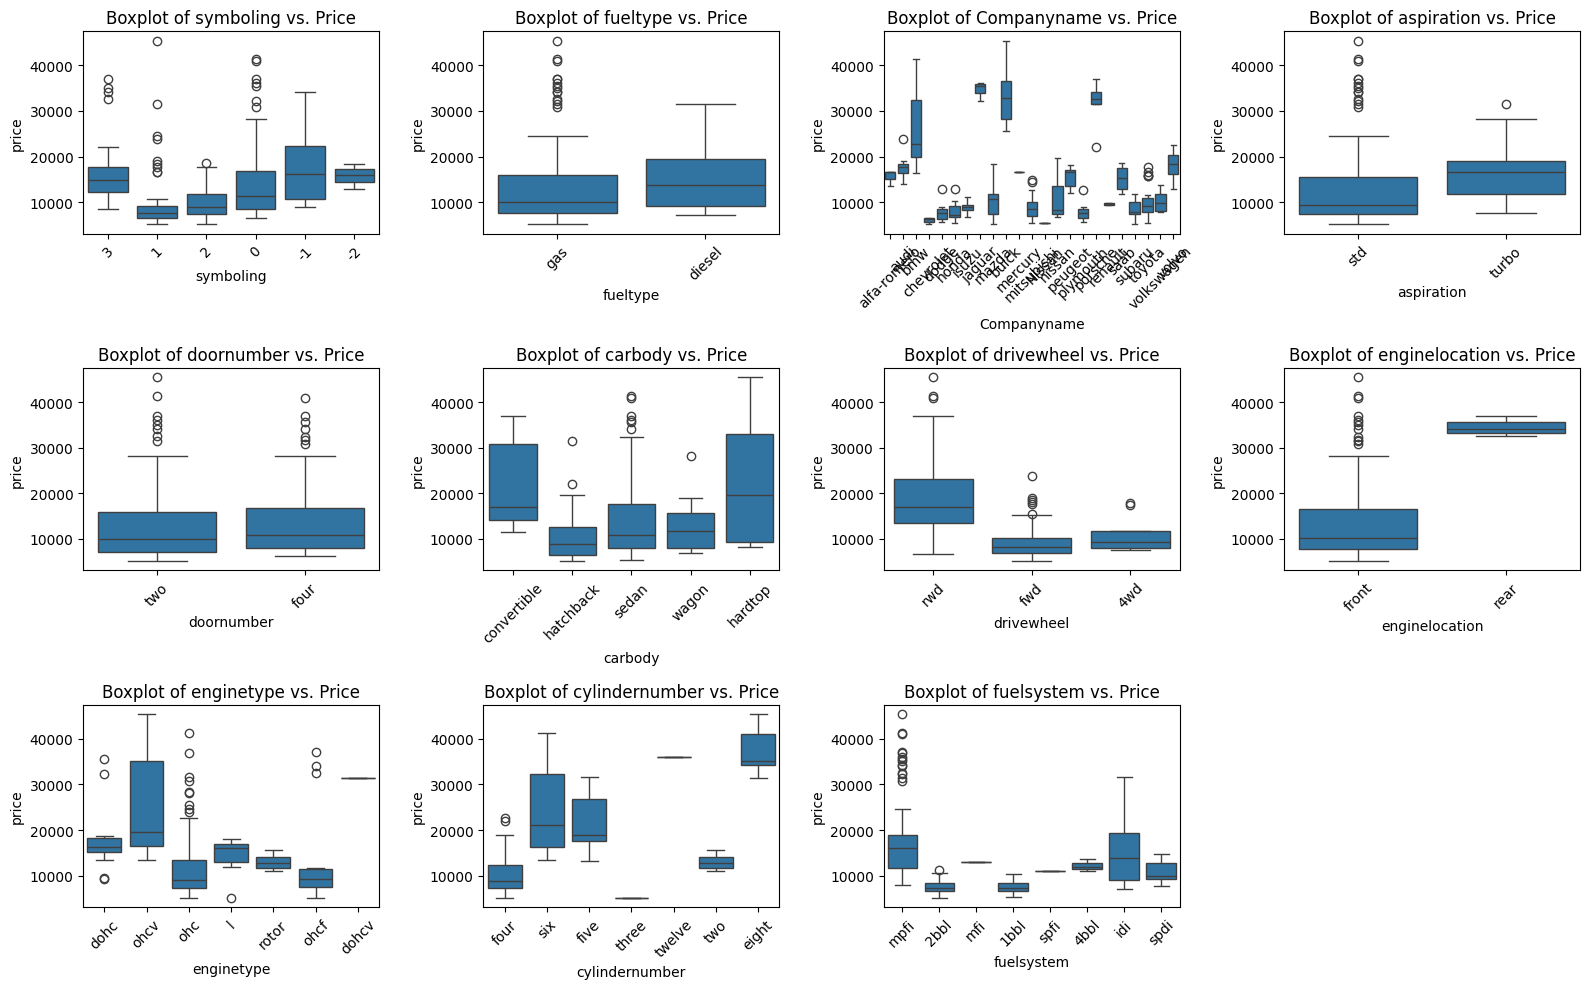

In [363]:
#create boxplot for each categorical variable against the target variable
plt.figure(figsize=(16,10))
for i,column in enumerate(categorical_varbls):
    plt.subplot(3,4, i+1)
    sns.boxplot(x=column, y= 'price', data=df)
    plt.title(f'Boxplot of {column} vs. Price')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

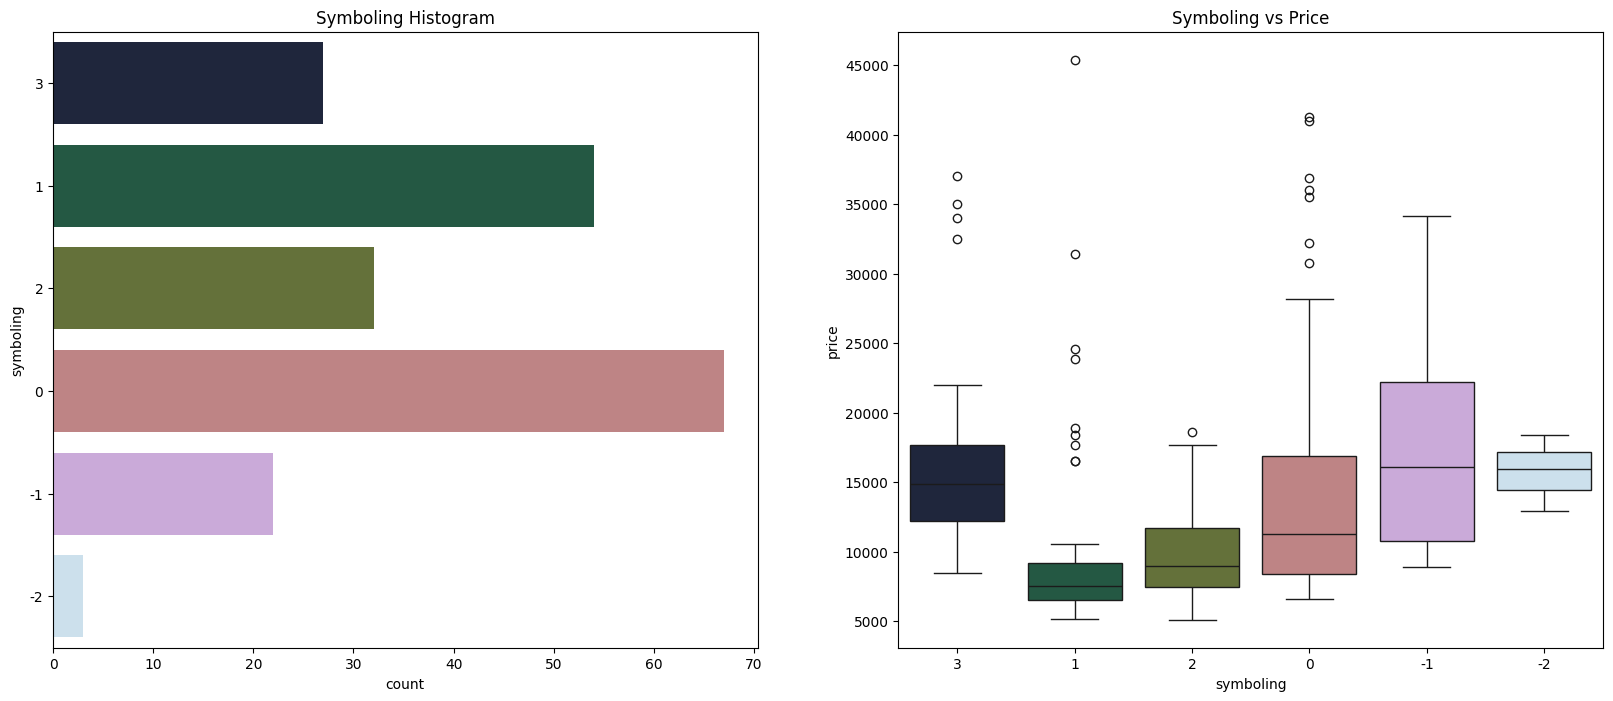

In [364]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling,palette=('cubehelix'))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=('cubehelix'))

plt.show()

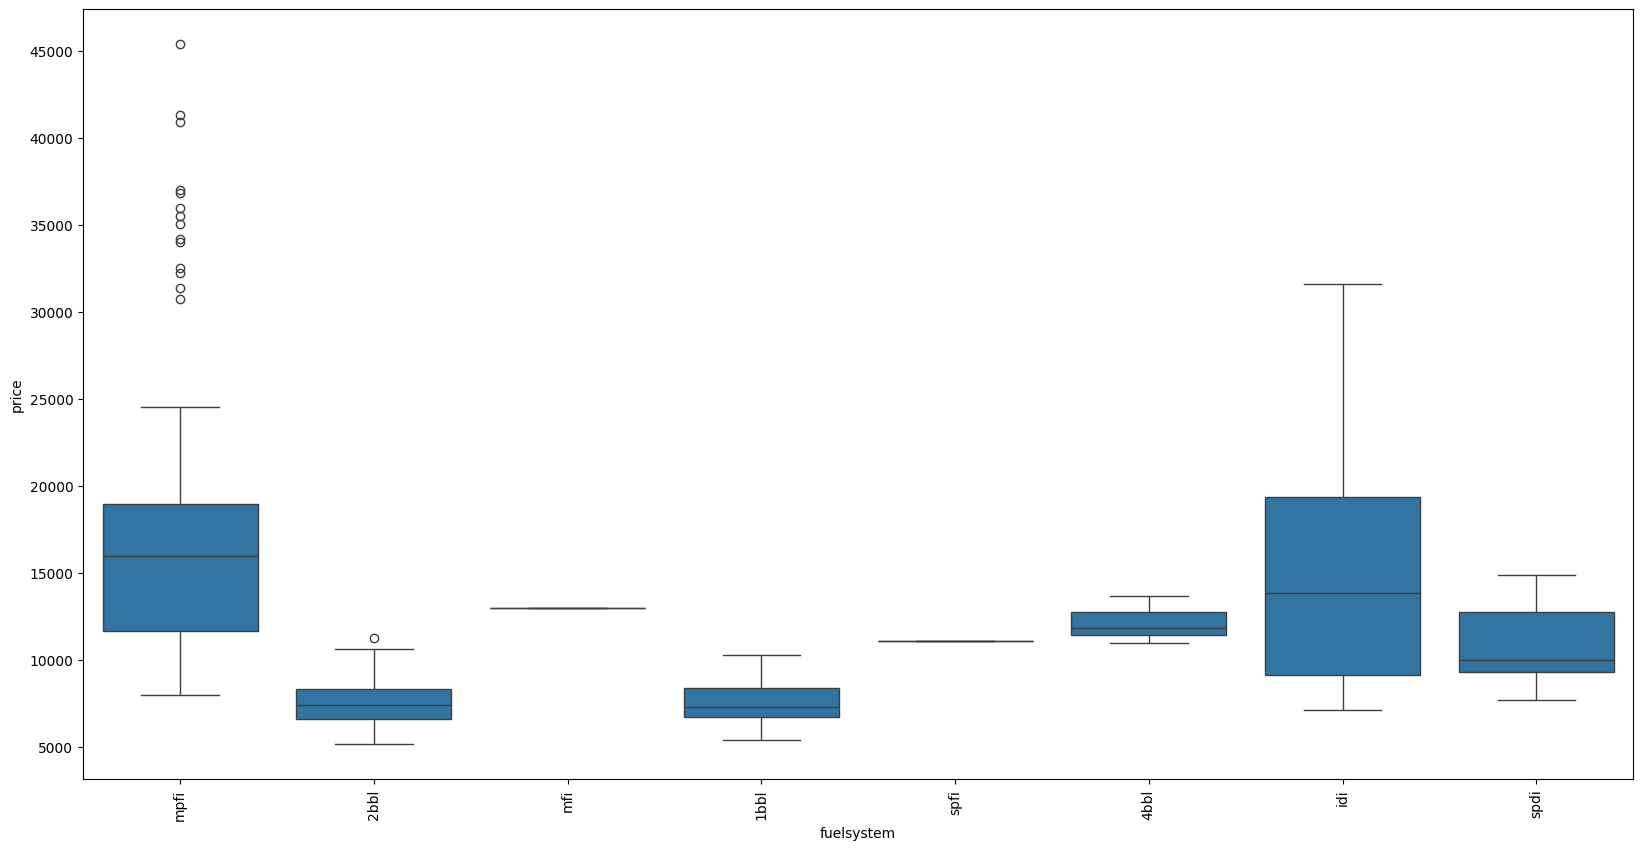

Average US car price: 13276.710570731706
Companyname
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [365]:
plt.figure(figsize=(20,10))
sns.boxplot(x= categorical_varbls[-1], y= 'price', data=df)
plt.xticks(rotation=90)
plt.show()
print('Average US car price:',df['price'].mean())
print(df.groupby('Companyname').price.mean().sort_values(ascending=False).head())

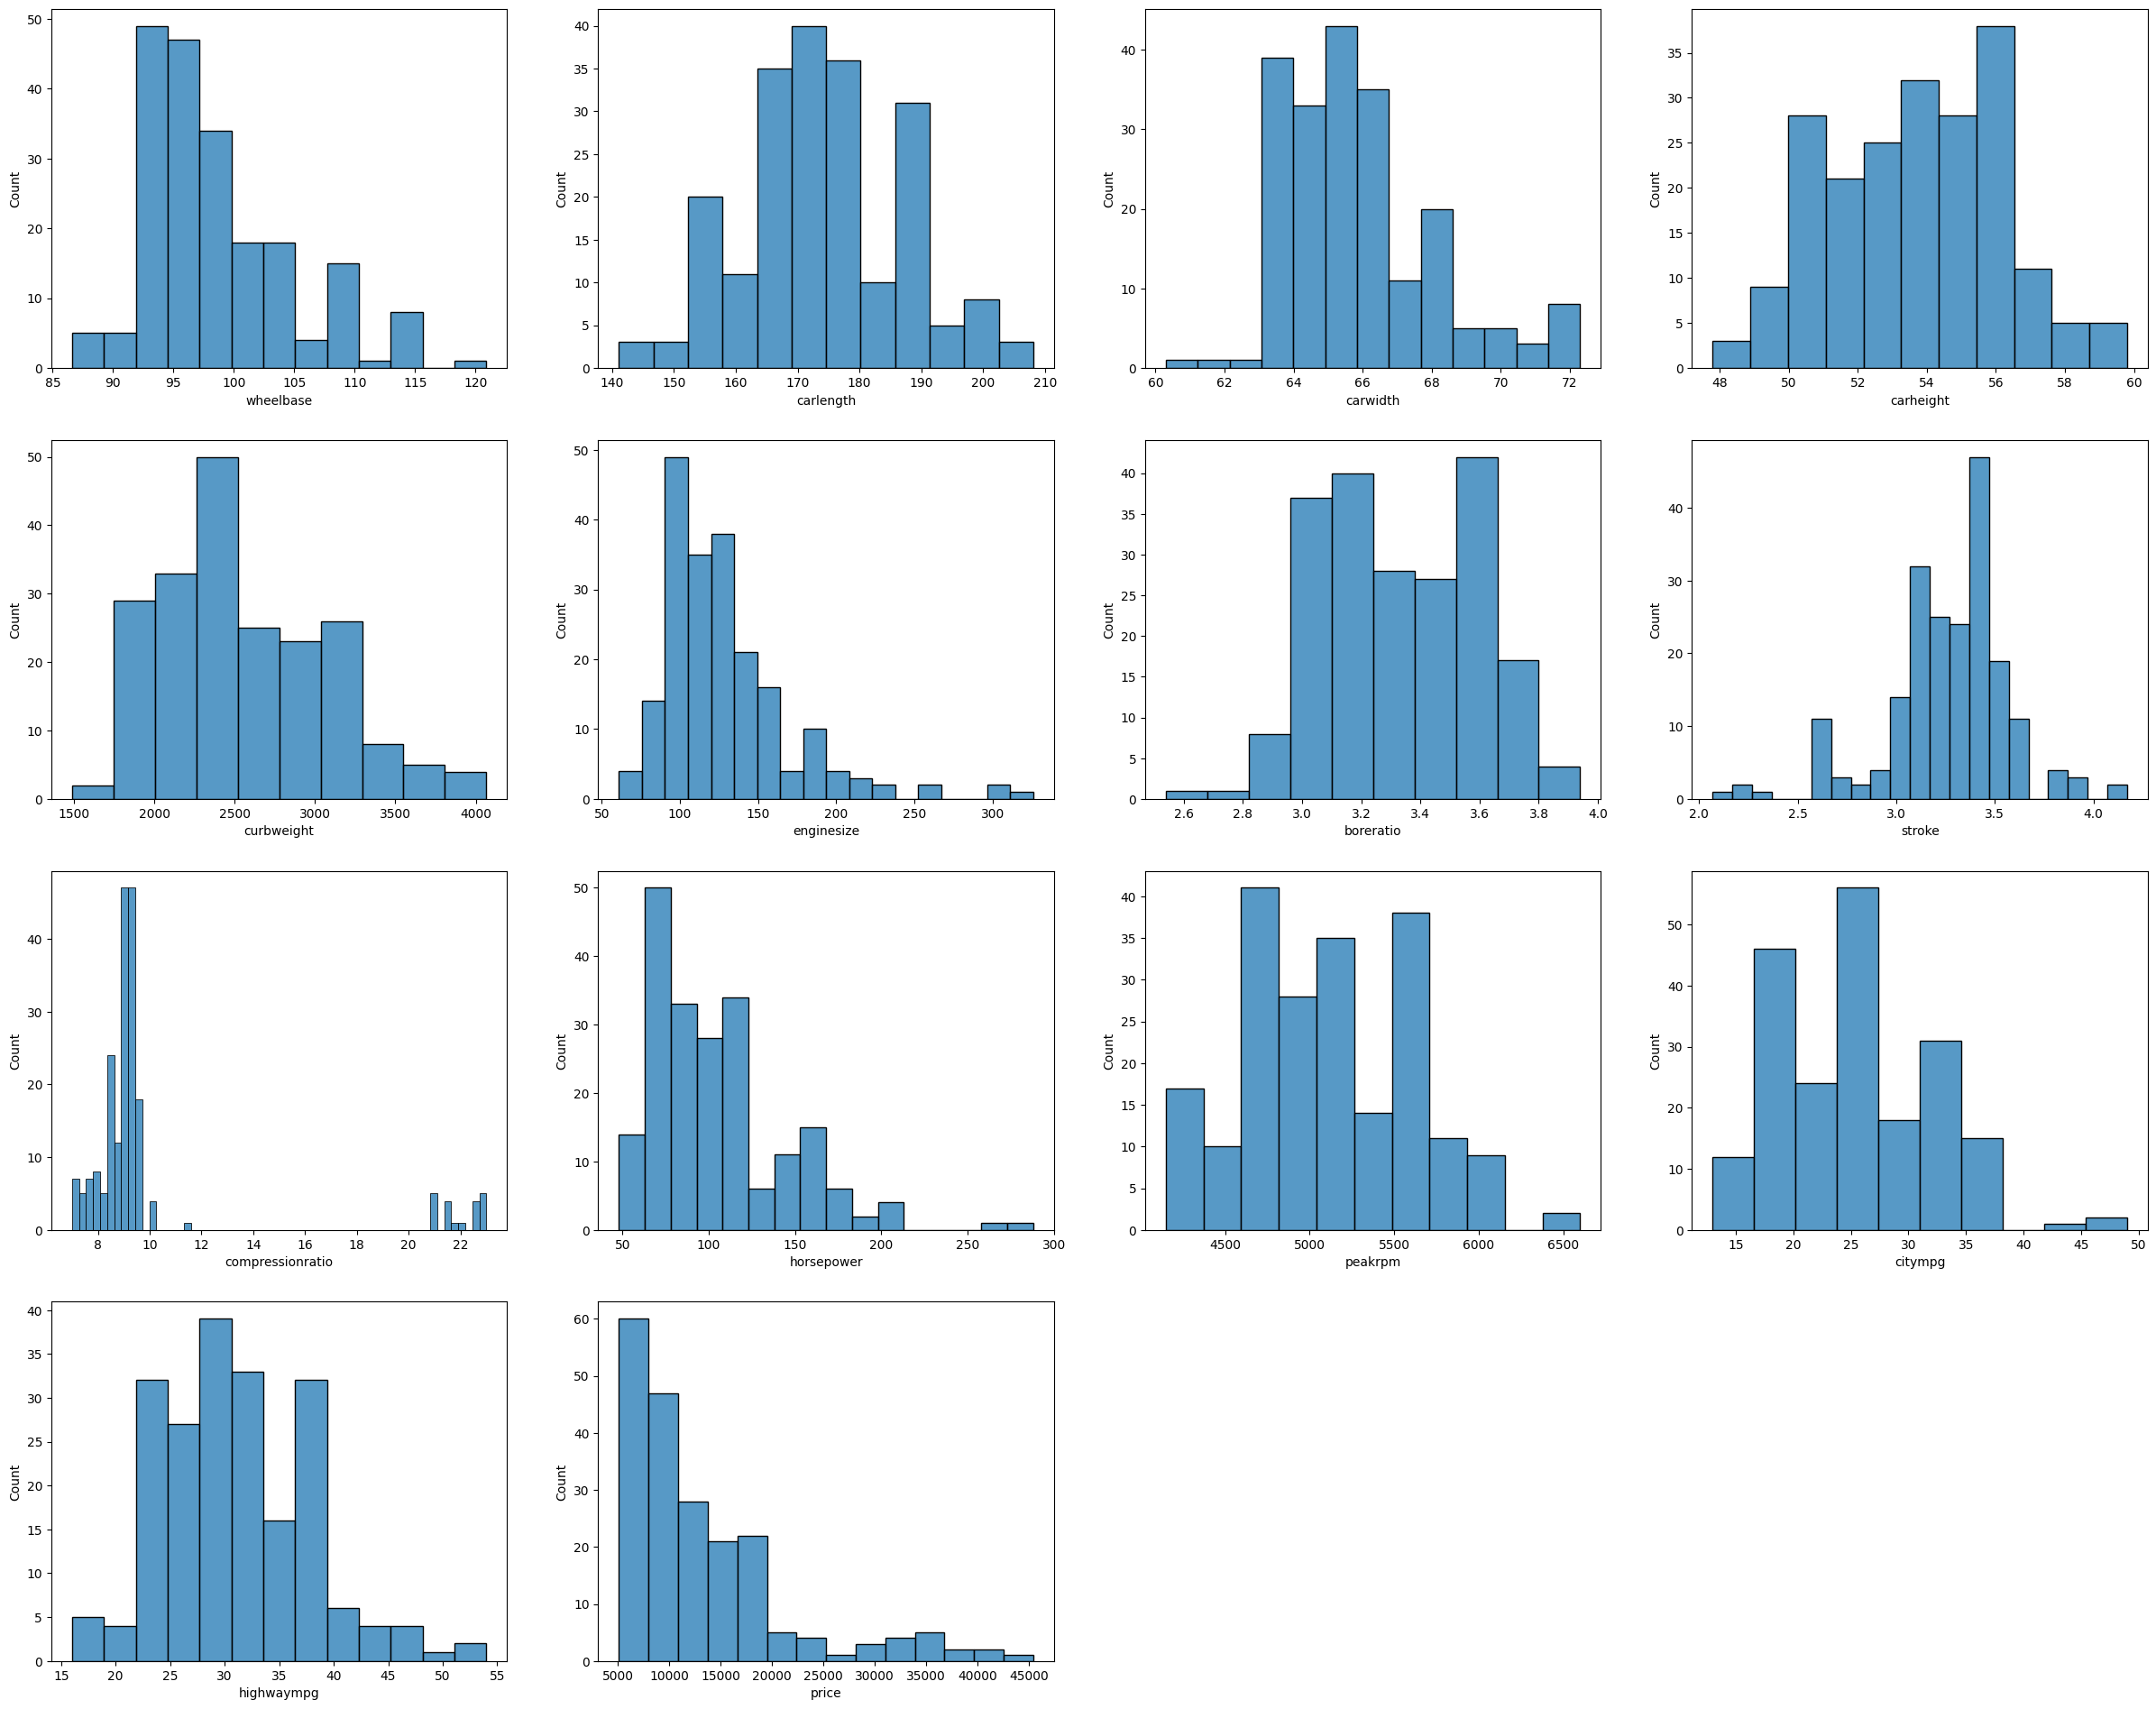

In [366]:
#Distribution of numerical variables.

fig=plt.figure(figsize=(30,30))
counter =0

for column in numerical_varbls:
    fig.add_subplot(5,4,counter+1)
    sns.histplot(data=df[column])
    plt.xlabel(column)
    counter=counter+1

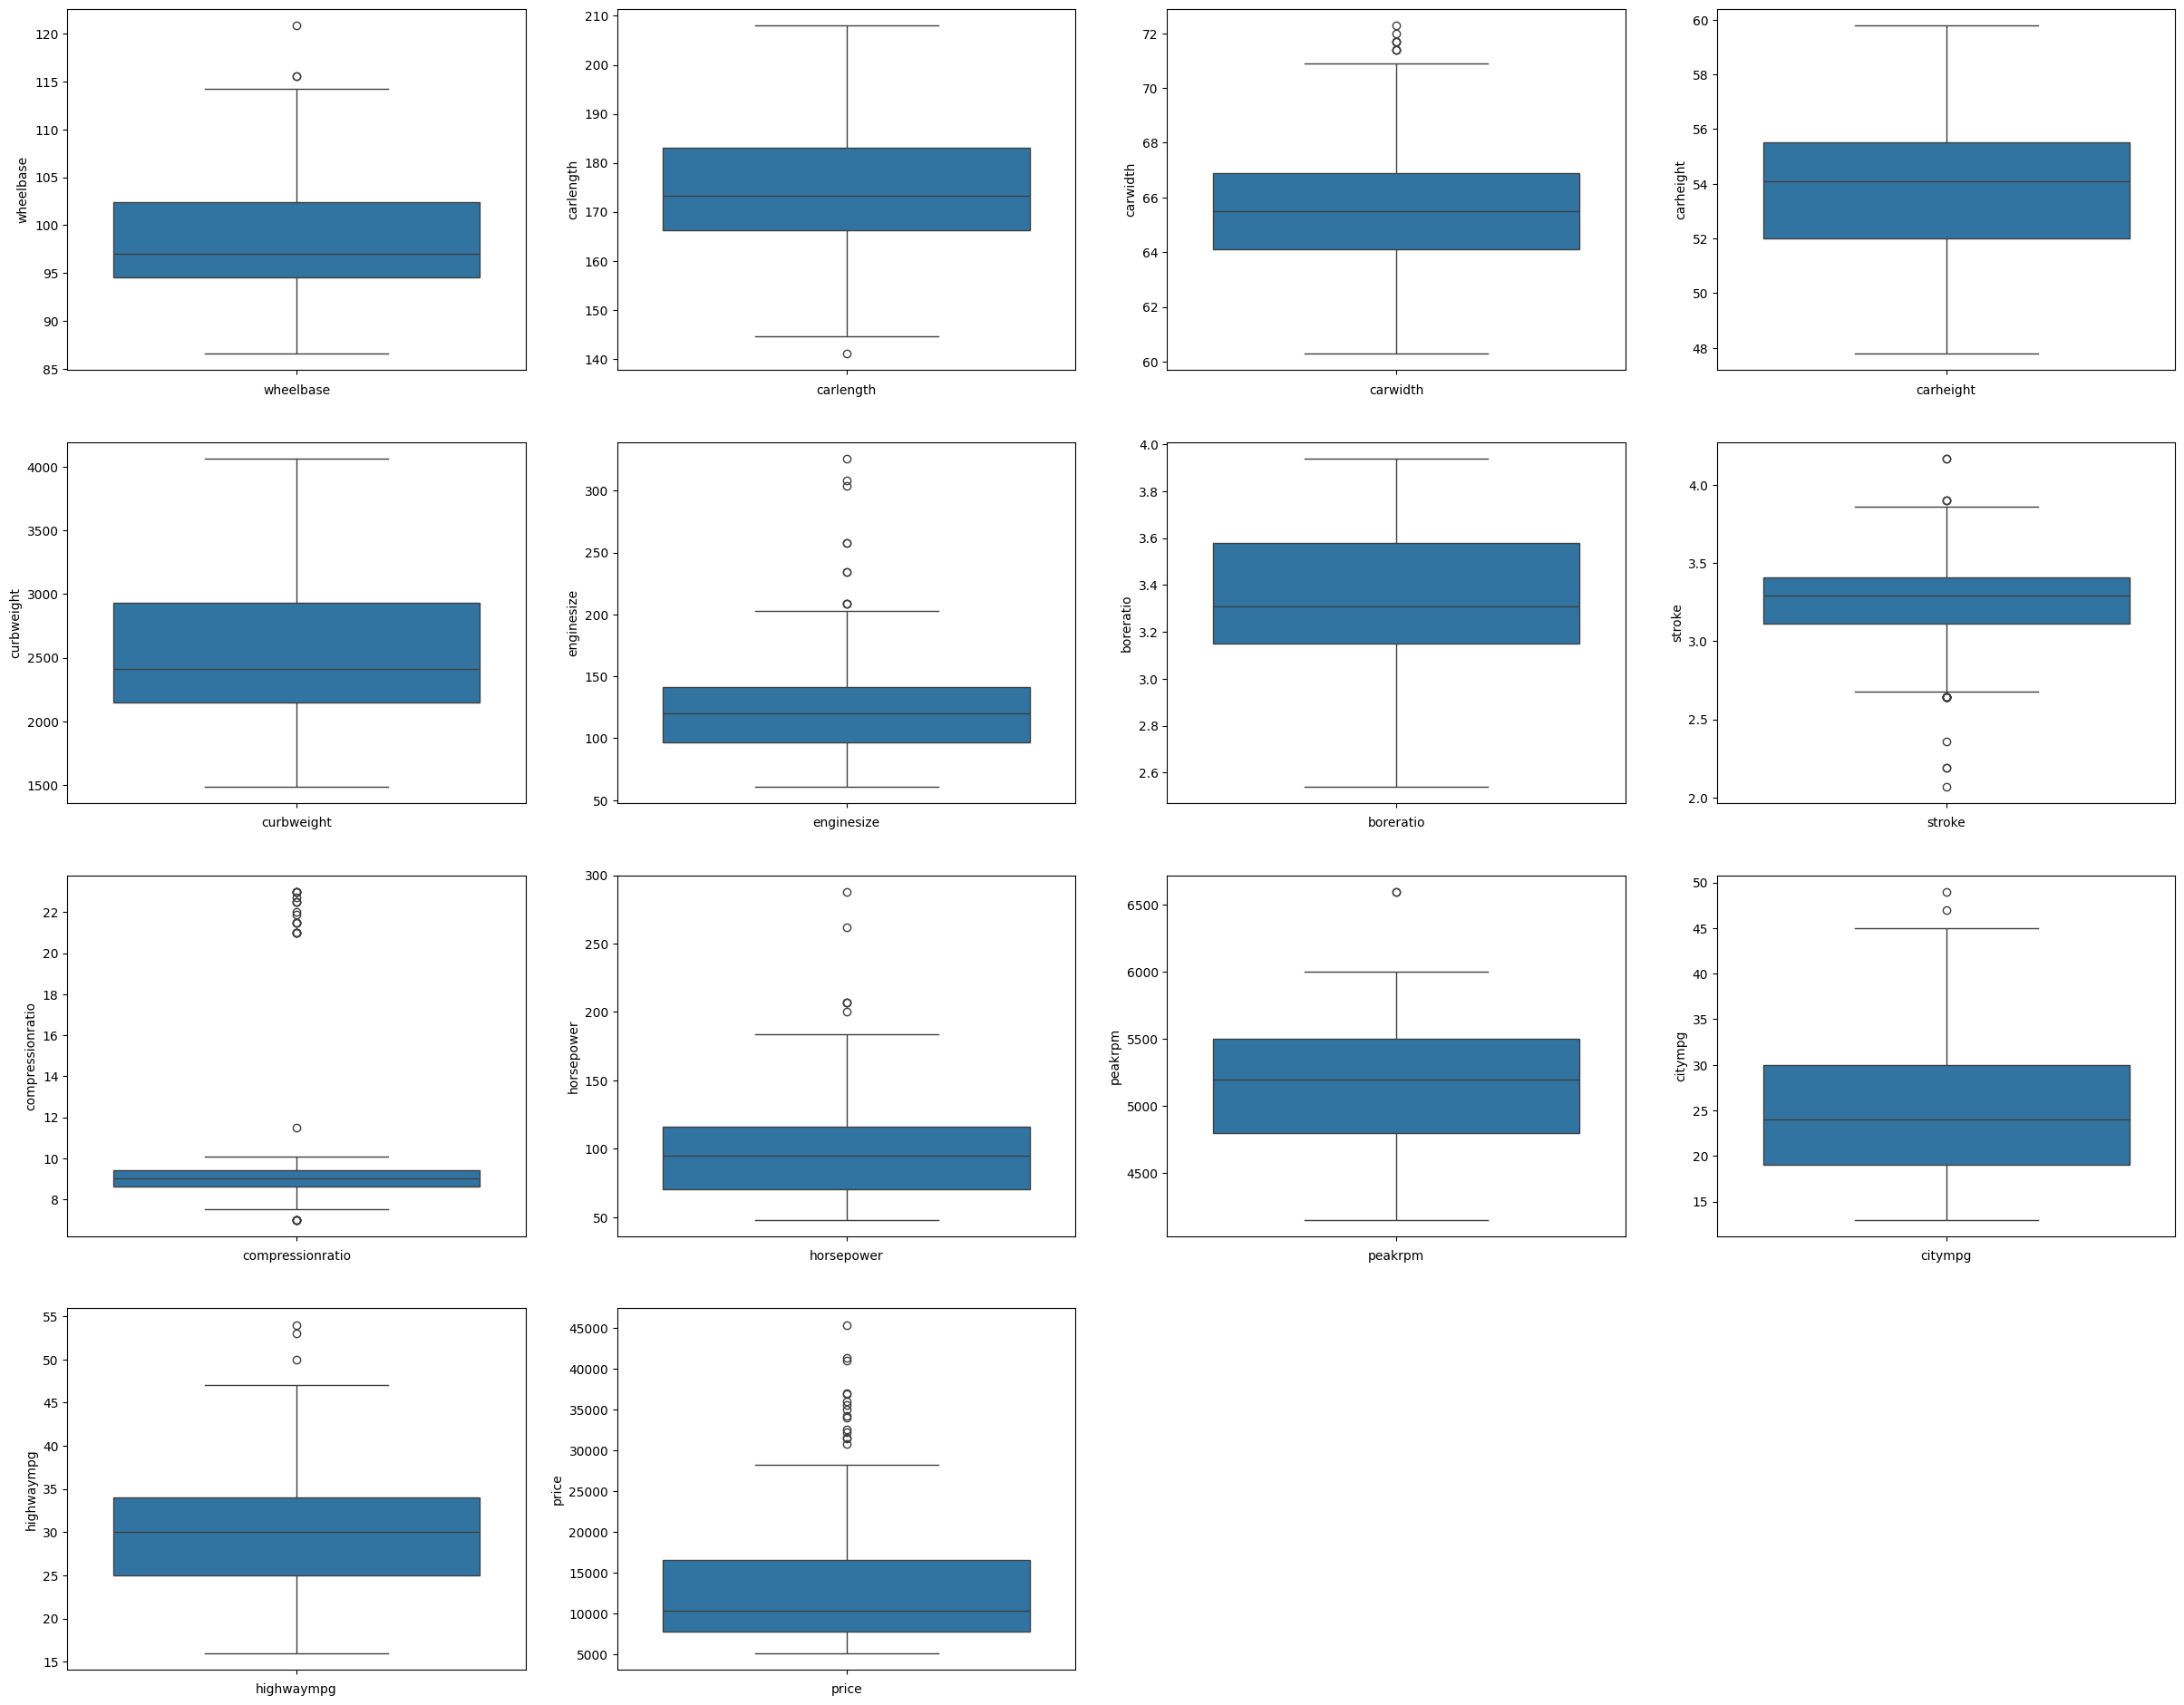

In [367]:
#boxplot to identify outliers
fig=plt.figure(figsize=(30,30))
counter=0

for column in numerical_varbls:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[column])
    plt.xlabel(column)
    counter=counter+1

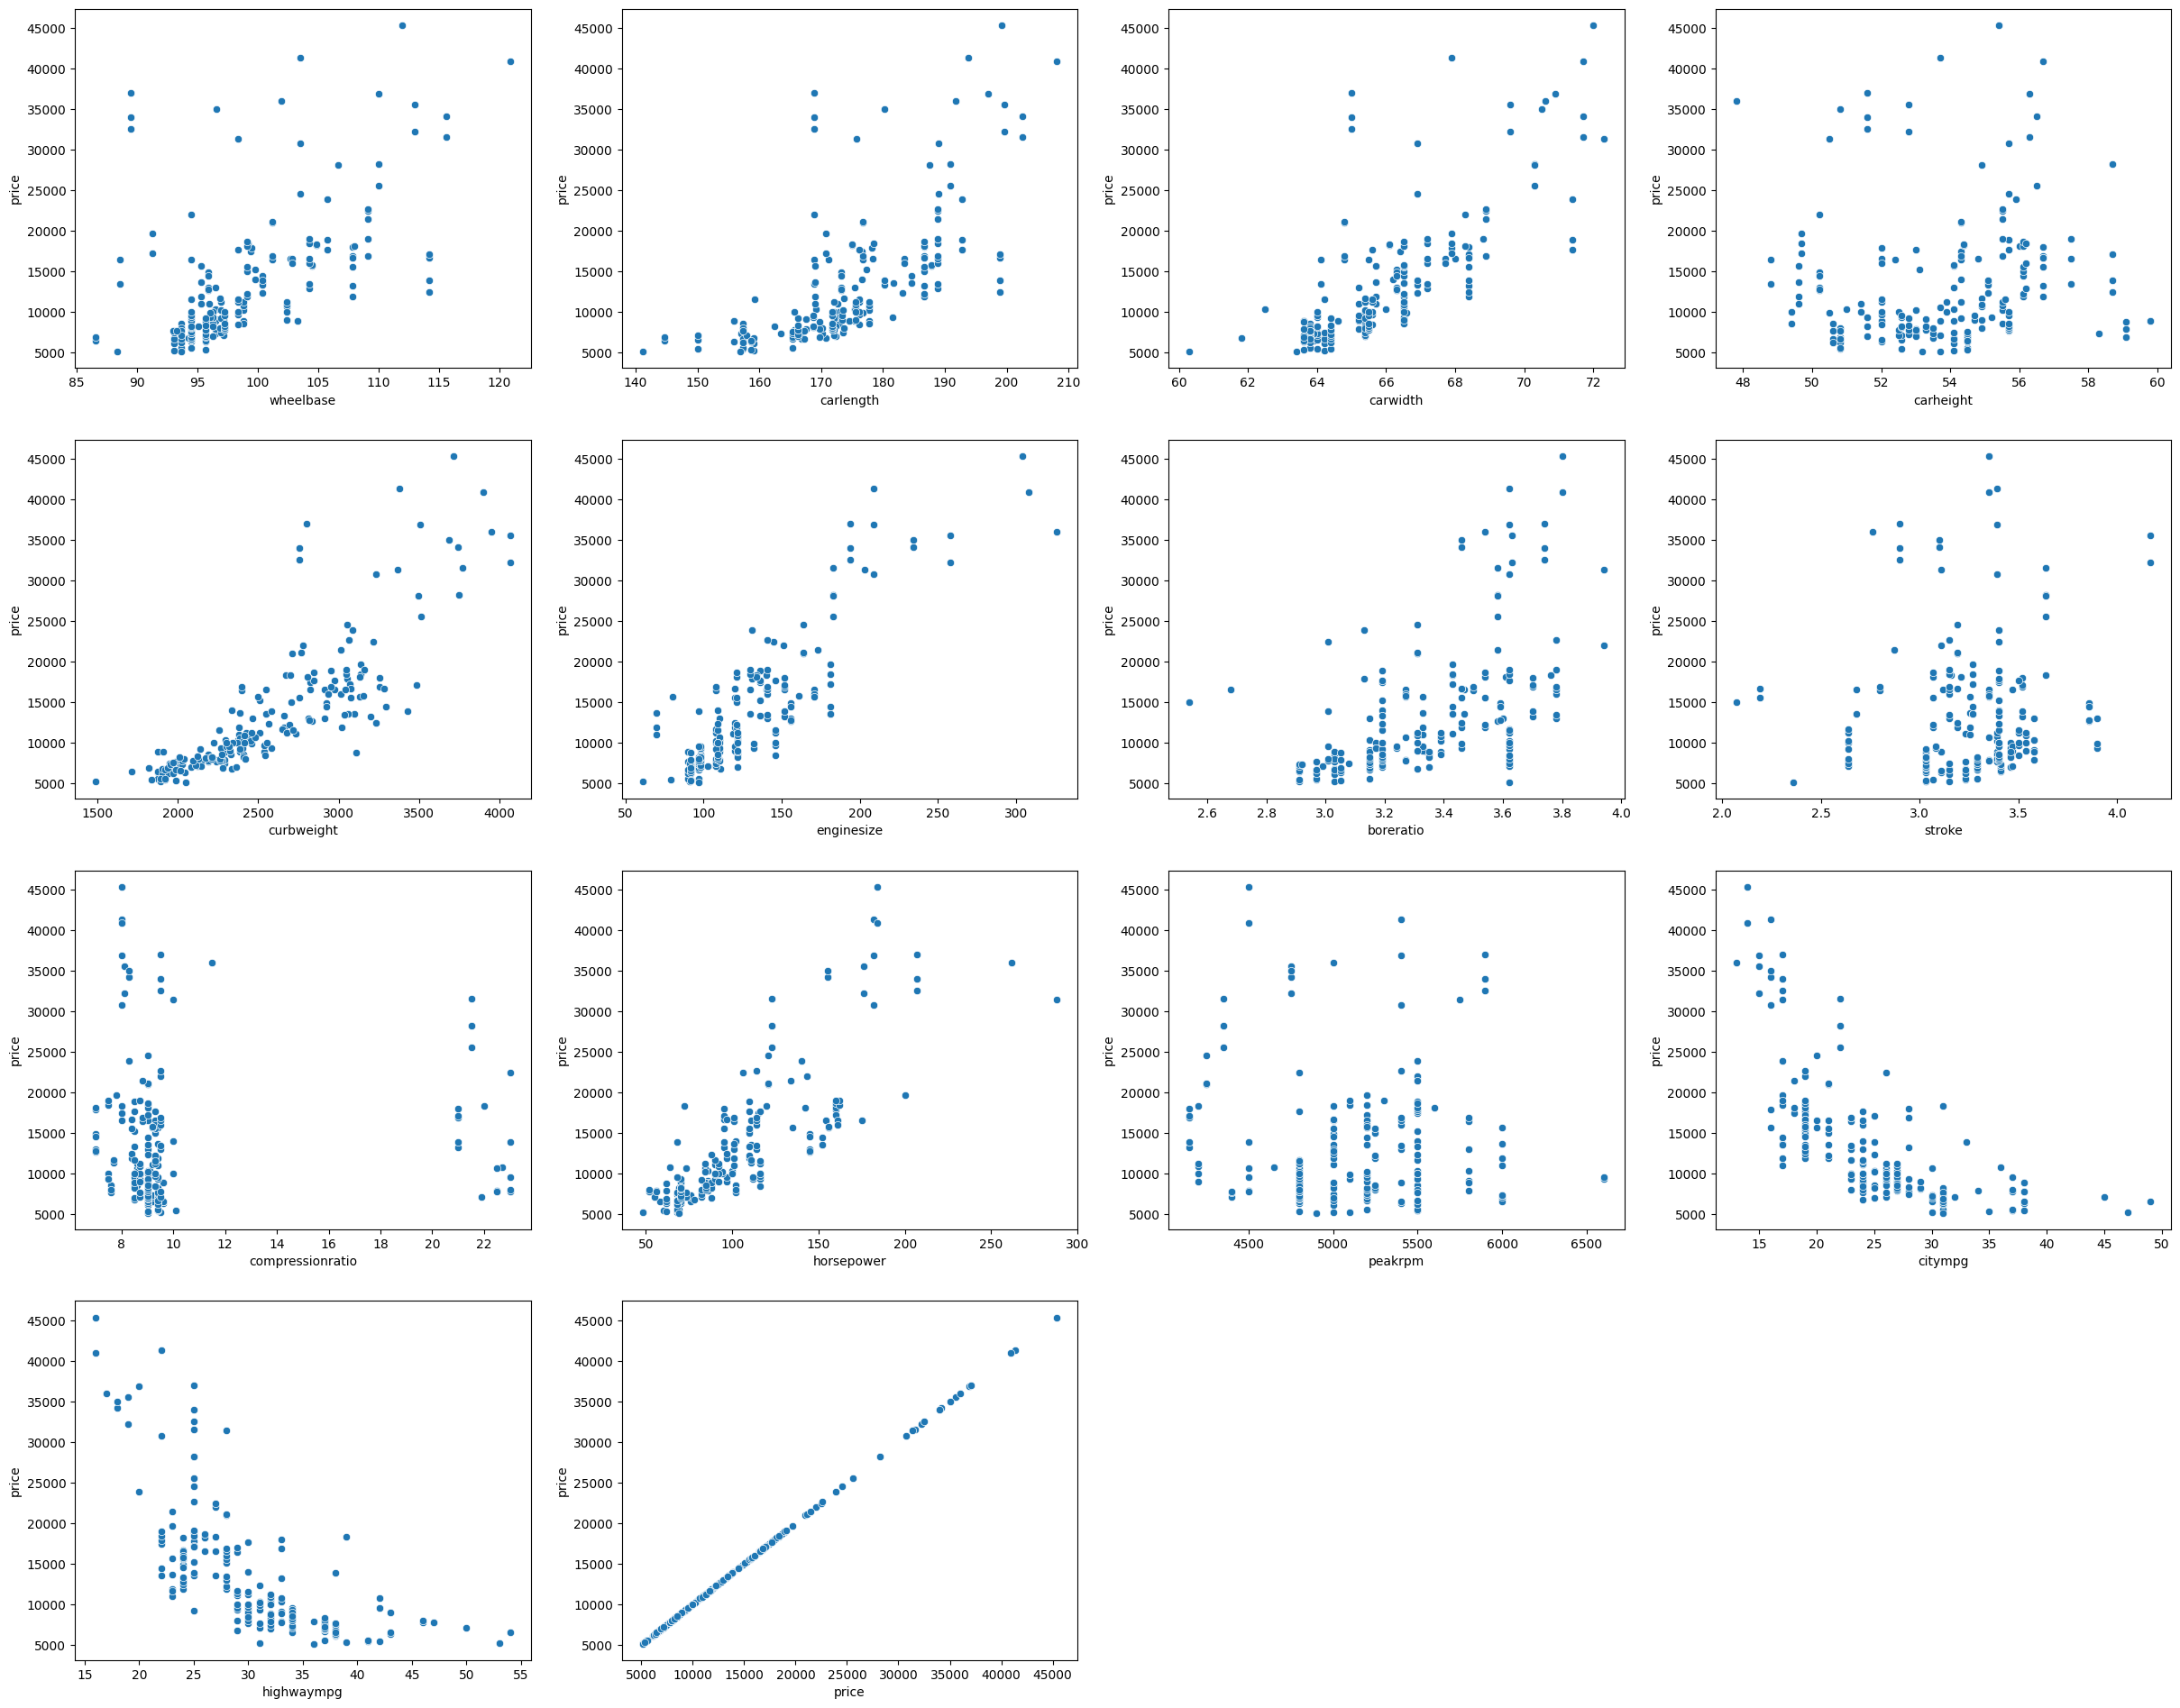

In [368]:
#scatter plot to visualize relationship b/w target variable ('price') & numerical variables

fig=plt.figure(figsize=(30,30))
counter=0

for column in numerical_varbls:
    fig.add_subplot(5,4,counter+1)
    sns.scatterplot(data=df,x=column,y='price')
    plt.xlabel(column)
    counter=counter+1

## Feature Selection

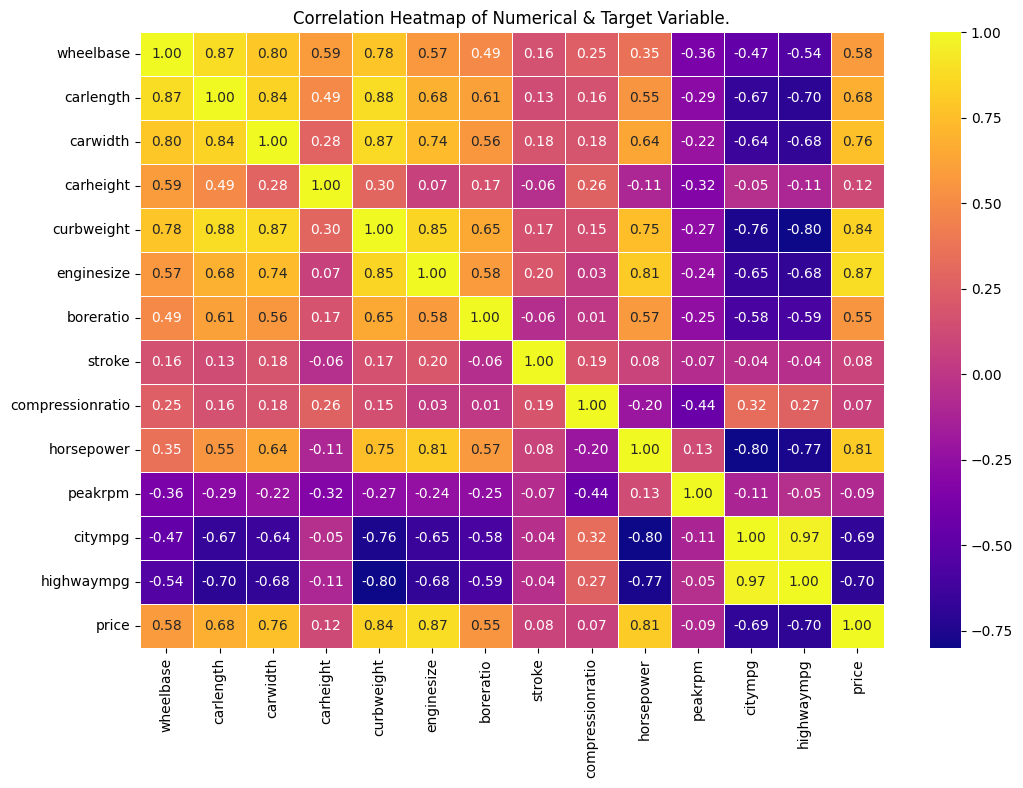

In [369]:
#Calculate the correlation matrix.
corr_matrix=df[numerical_varbls].corr()

#plotting Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='plasma',fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap of Numerical & Target Variable.')
plt.show()

### Highly correlated columns (where correlation>0.85)

##### *citympg,highwaympg , *curbweight,enginesize , *curbweight,carlength, *curbweight,carwidth, *wheelbase,carlength

<Axes: xlabel='wheelbase', ylabel='carlength'>

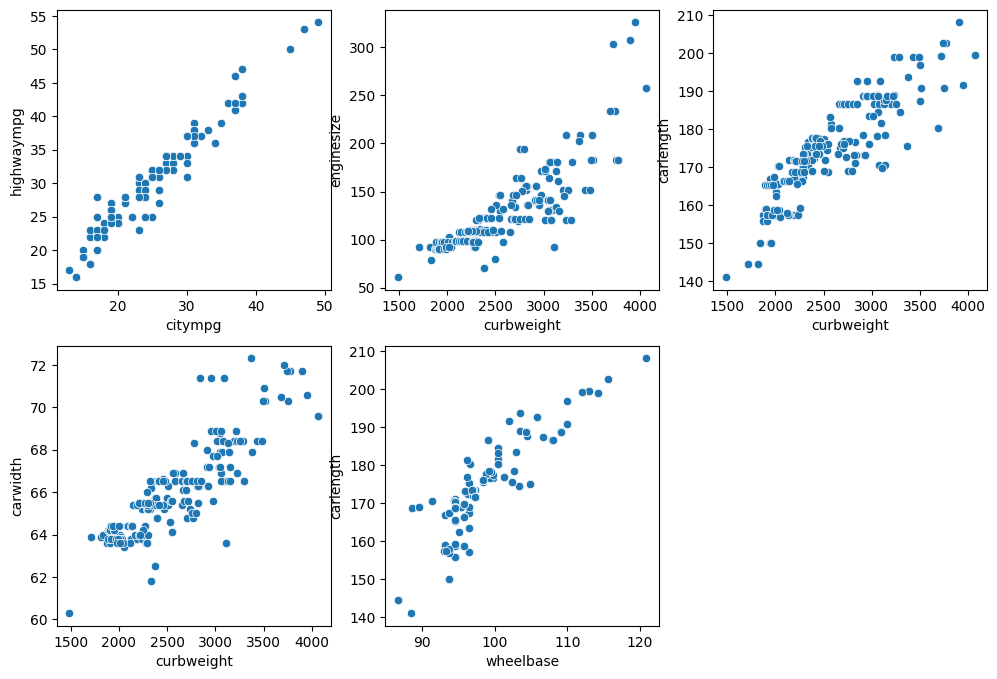

In [370]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.scatterplot(data=df,x='citympg',y='highwaympg')

plt.subplot(2,3,2)
sns.scatterplot(data=df,x='curbweight',y='enginesize')

plt.subplot(2,3,3)
sns.scatterplot(data=df,x='curbweight',y='carlength')

plt.subplot(2,3,4)
sns.scatterplot(data=df,x='curbweight',y='carwidth')

plt.subplot(2,3,5)
sns.scatterplot(data=df,x='wheelbase',y='carlength')

In [1]:
# We can drop 'highwaympg','curbweight','wheelbase'

In [371]:
df1=df.copy()

In [372]:
df1.drop(['highwaympg','curbweight','wheelbase'],axis=1,inplace=True)

In [373]:
#dropping company name
df1.drop(['Companyname'],axis=1,inplace=True)

#### Plotting pairwise scatter plot and thus observing linear relationships.

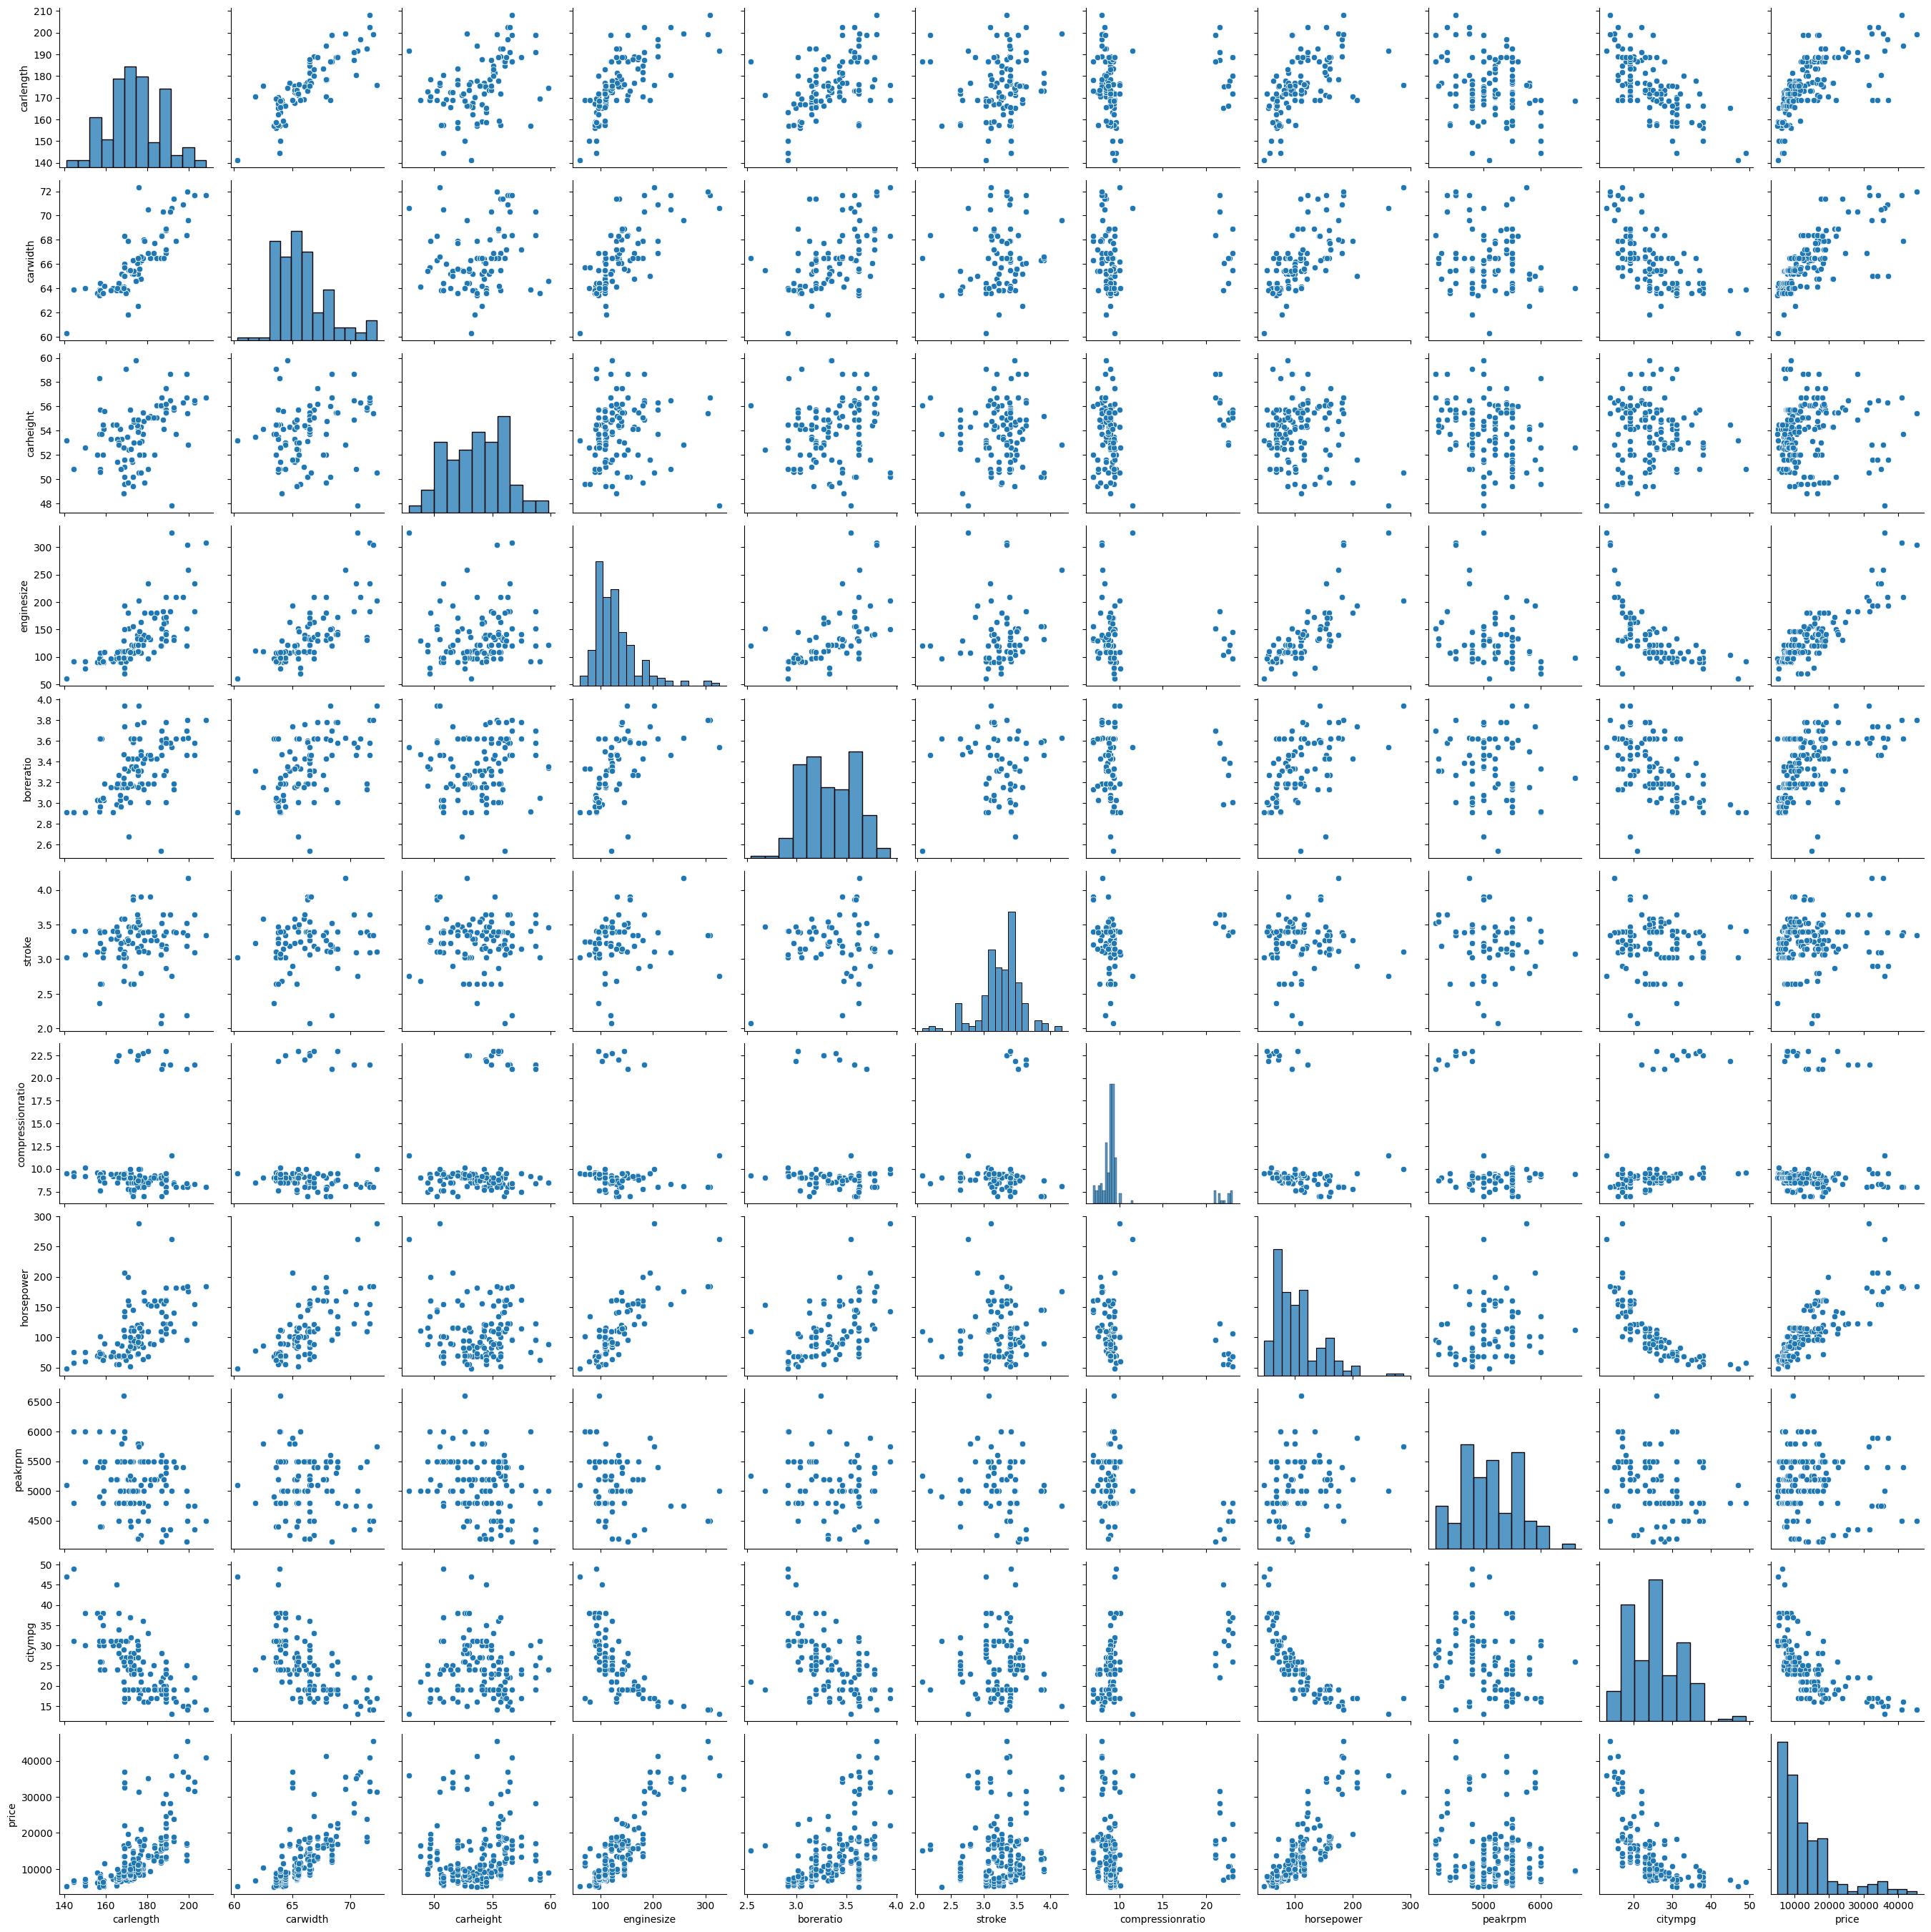

In [374]:
#Select only numerical variables
numerical_varbls=df1.select_dtypes(include=['int64','float64'])

#Plot pair_plot
sns.pairplot(numerical_varbls)
plt.show()

## Outlier Treatment

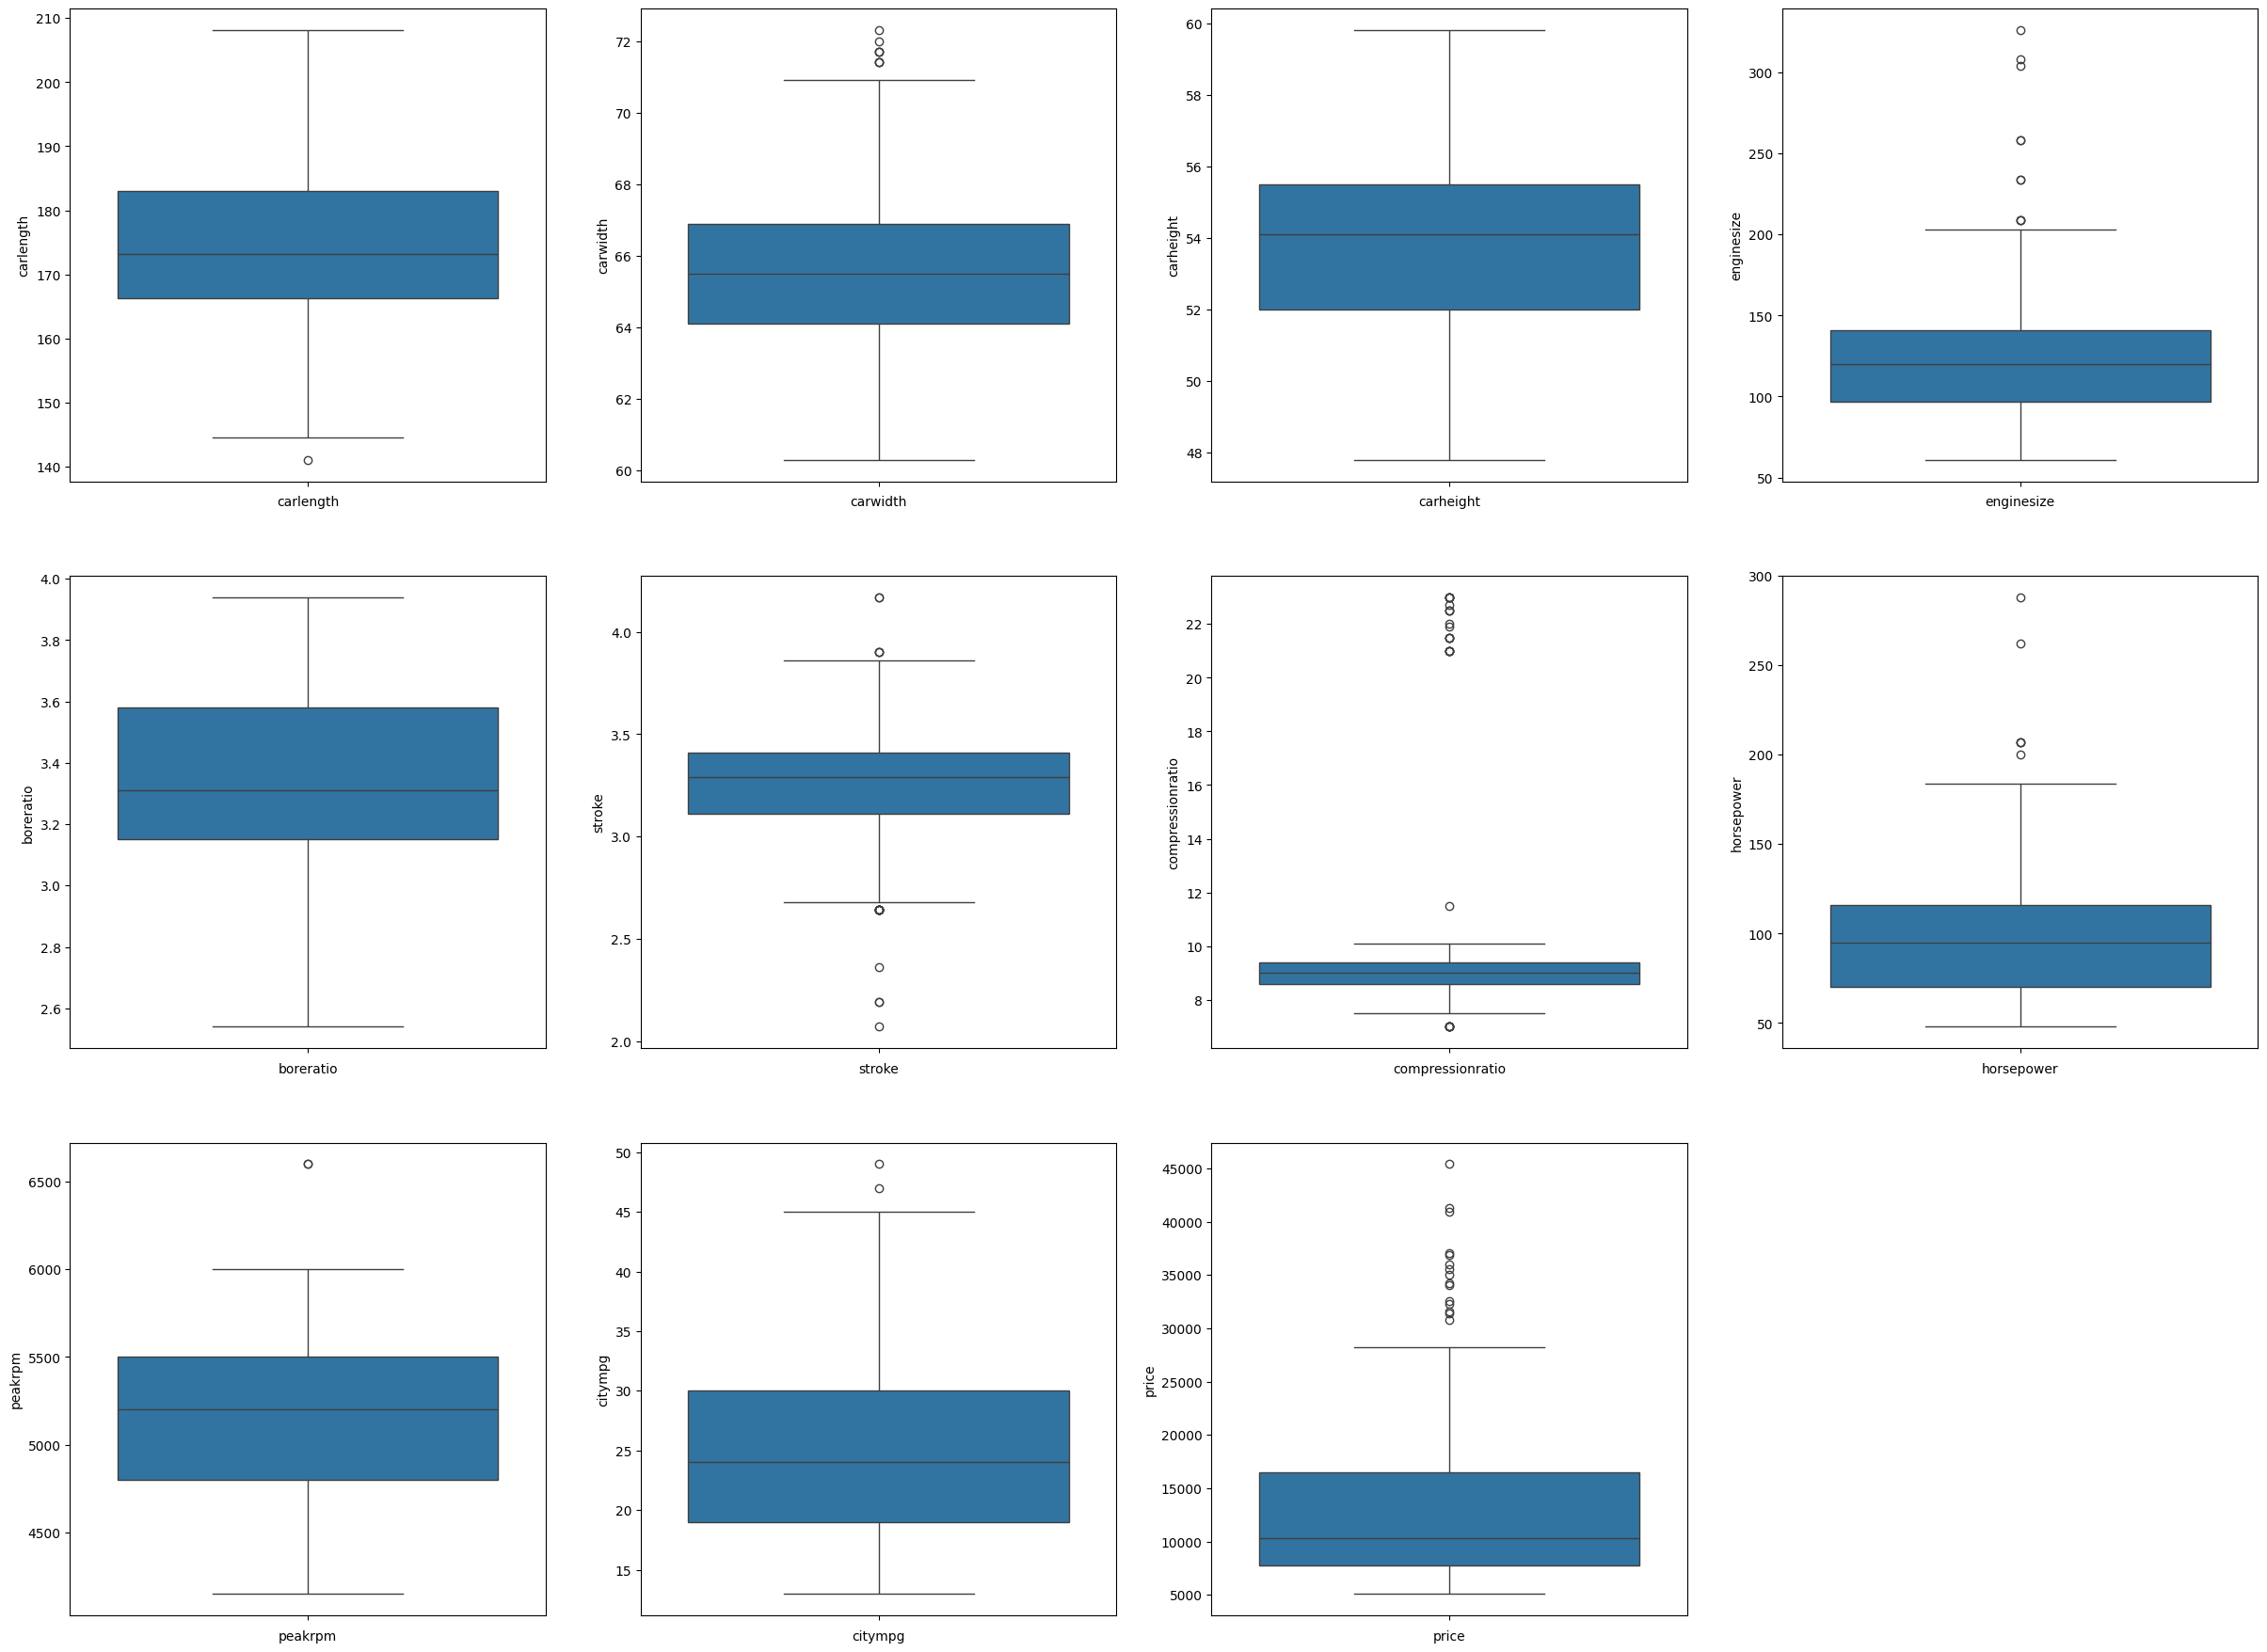

In [375]:
#box plot to identify outliers
fig=plt.figure(figsize=(30,30))
counter=0

for column in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df1[column])
    plt.xlabel(column)
    counter=counter+1

In [376]:
def whisker(column):
    q1,q3=np.percentile(column,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [377]:
for i in df1.select_dtypes(include="number").columns:
    lw,uw=whisker(df1[i])
    df1[i]=np.where(df1[i]<lw,lw,df1[i])
    df1[i]=np.where(df1[i]>uw,uw,df1[i])

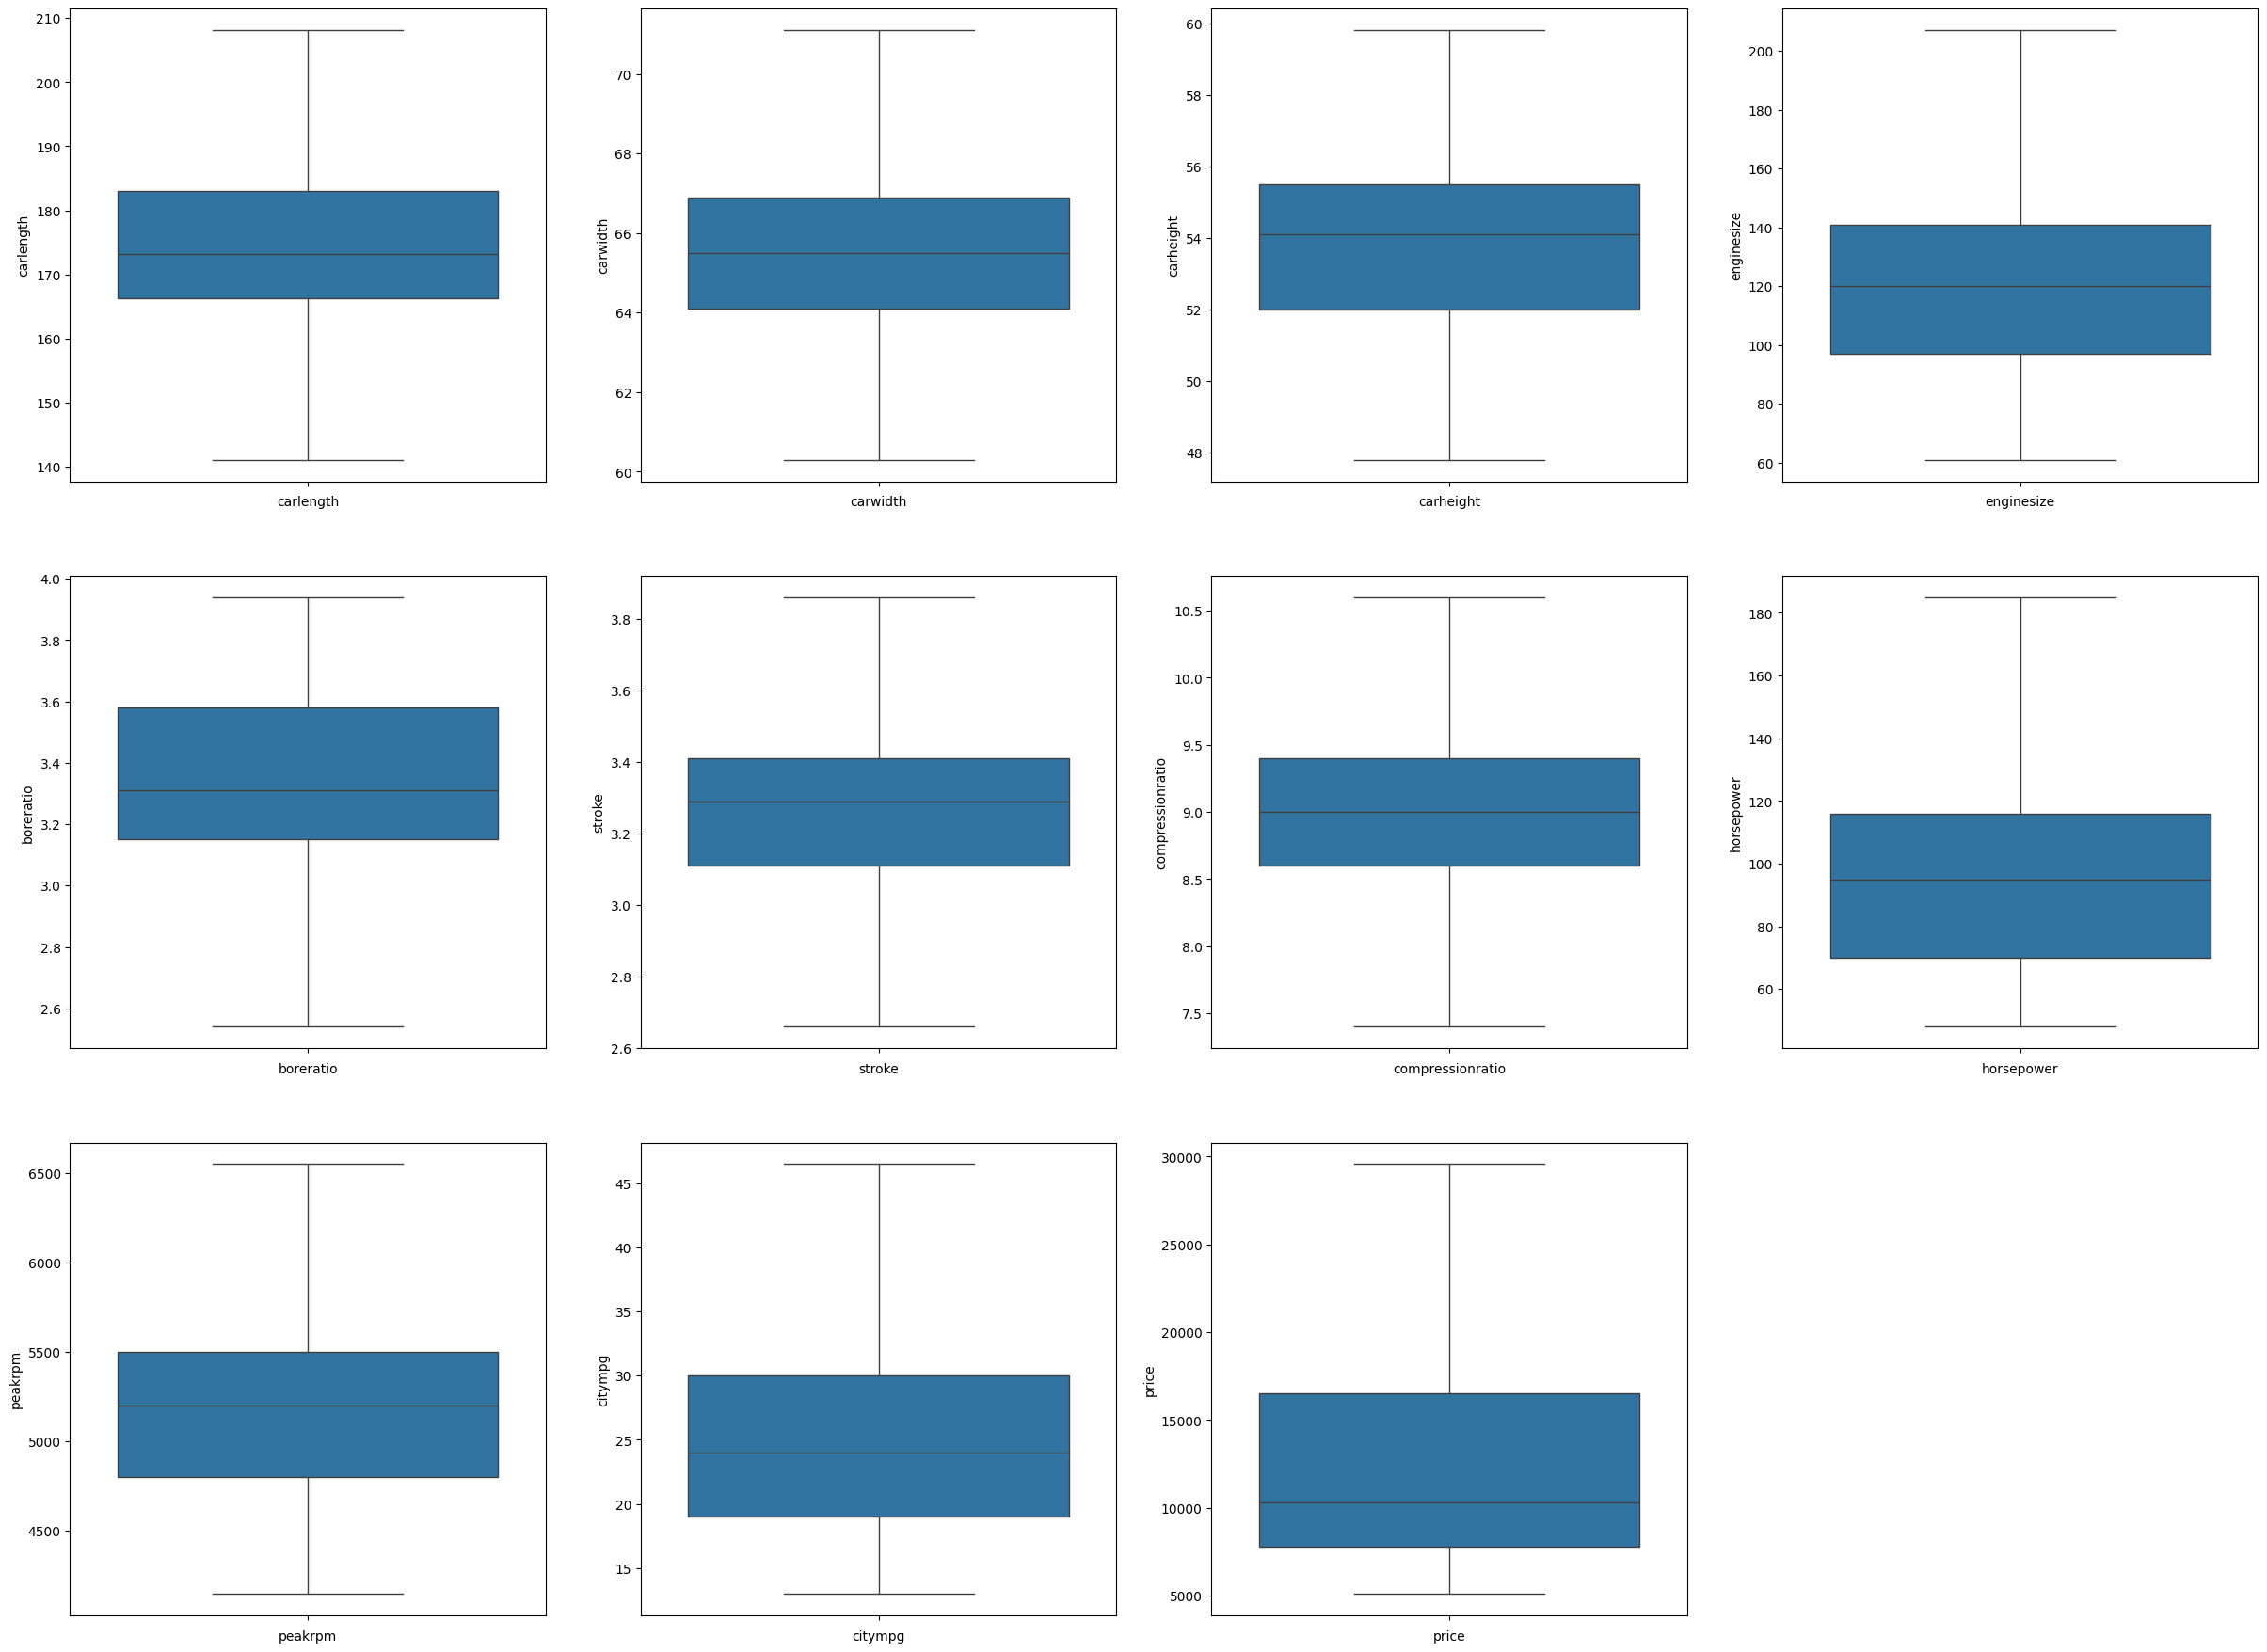

In [378]:
#box plot after outlier treatment

fig=plt.figure(figsize=(30,30))
counter=0

for column in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df1[column])
    plt.xlabel(column)
    counter=counter+1

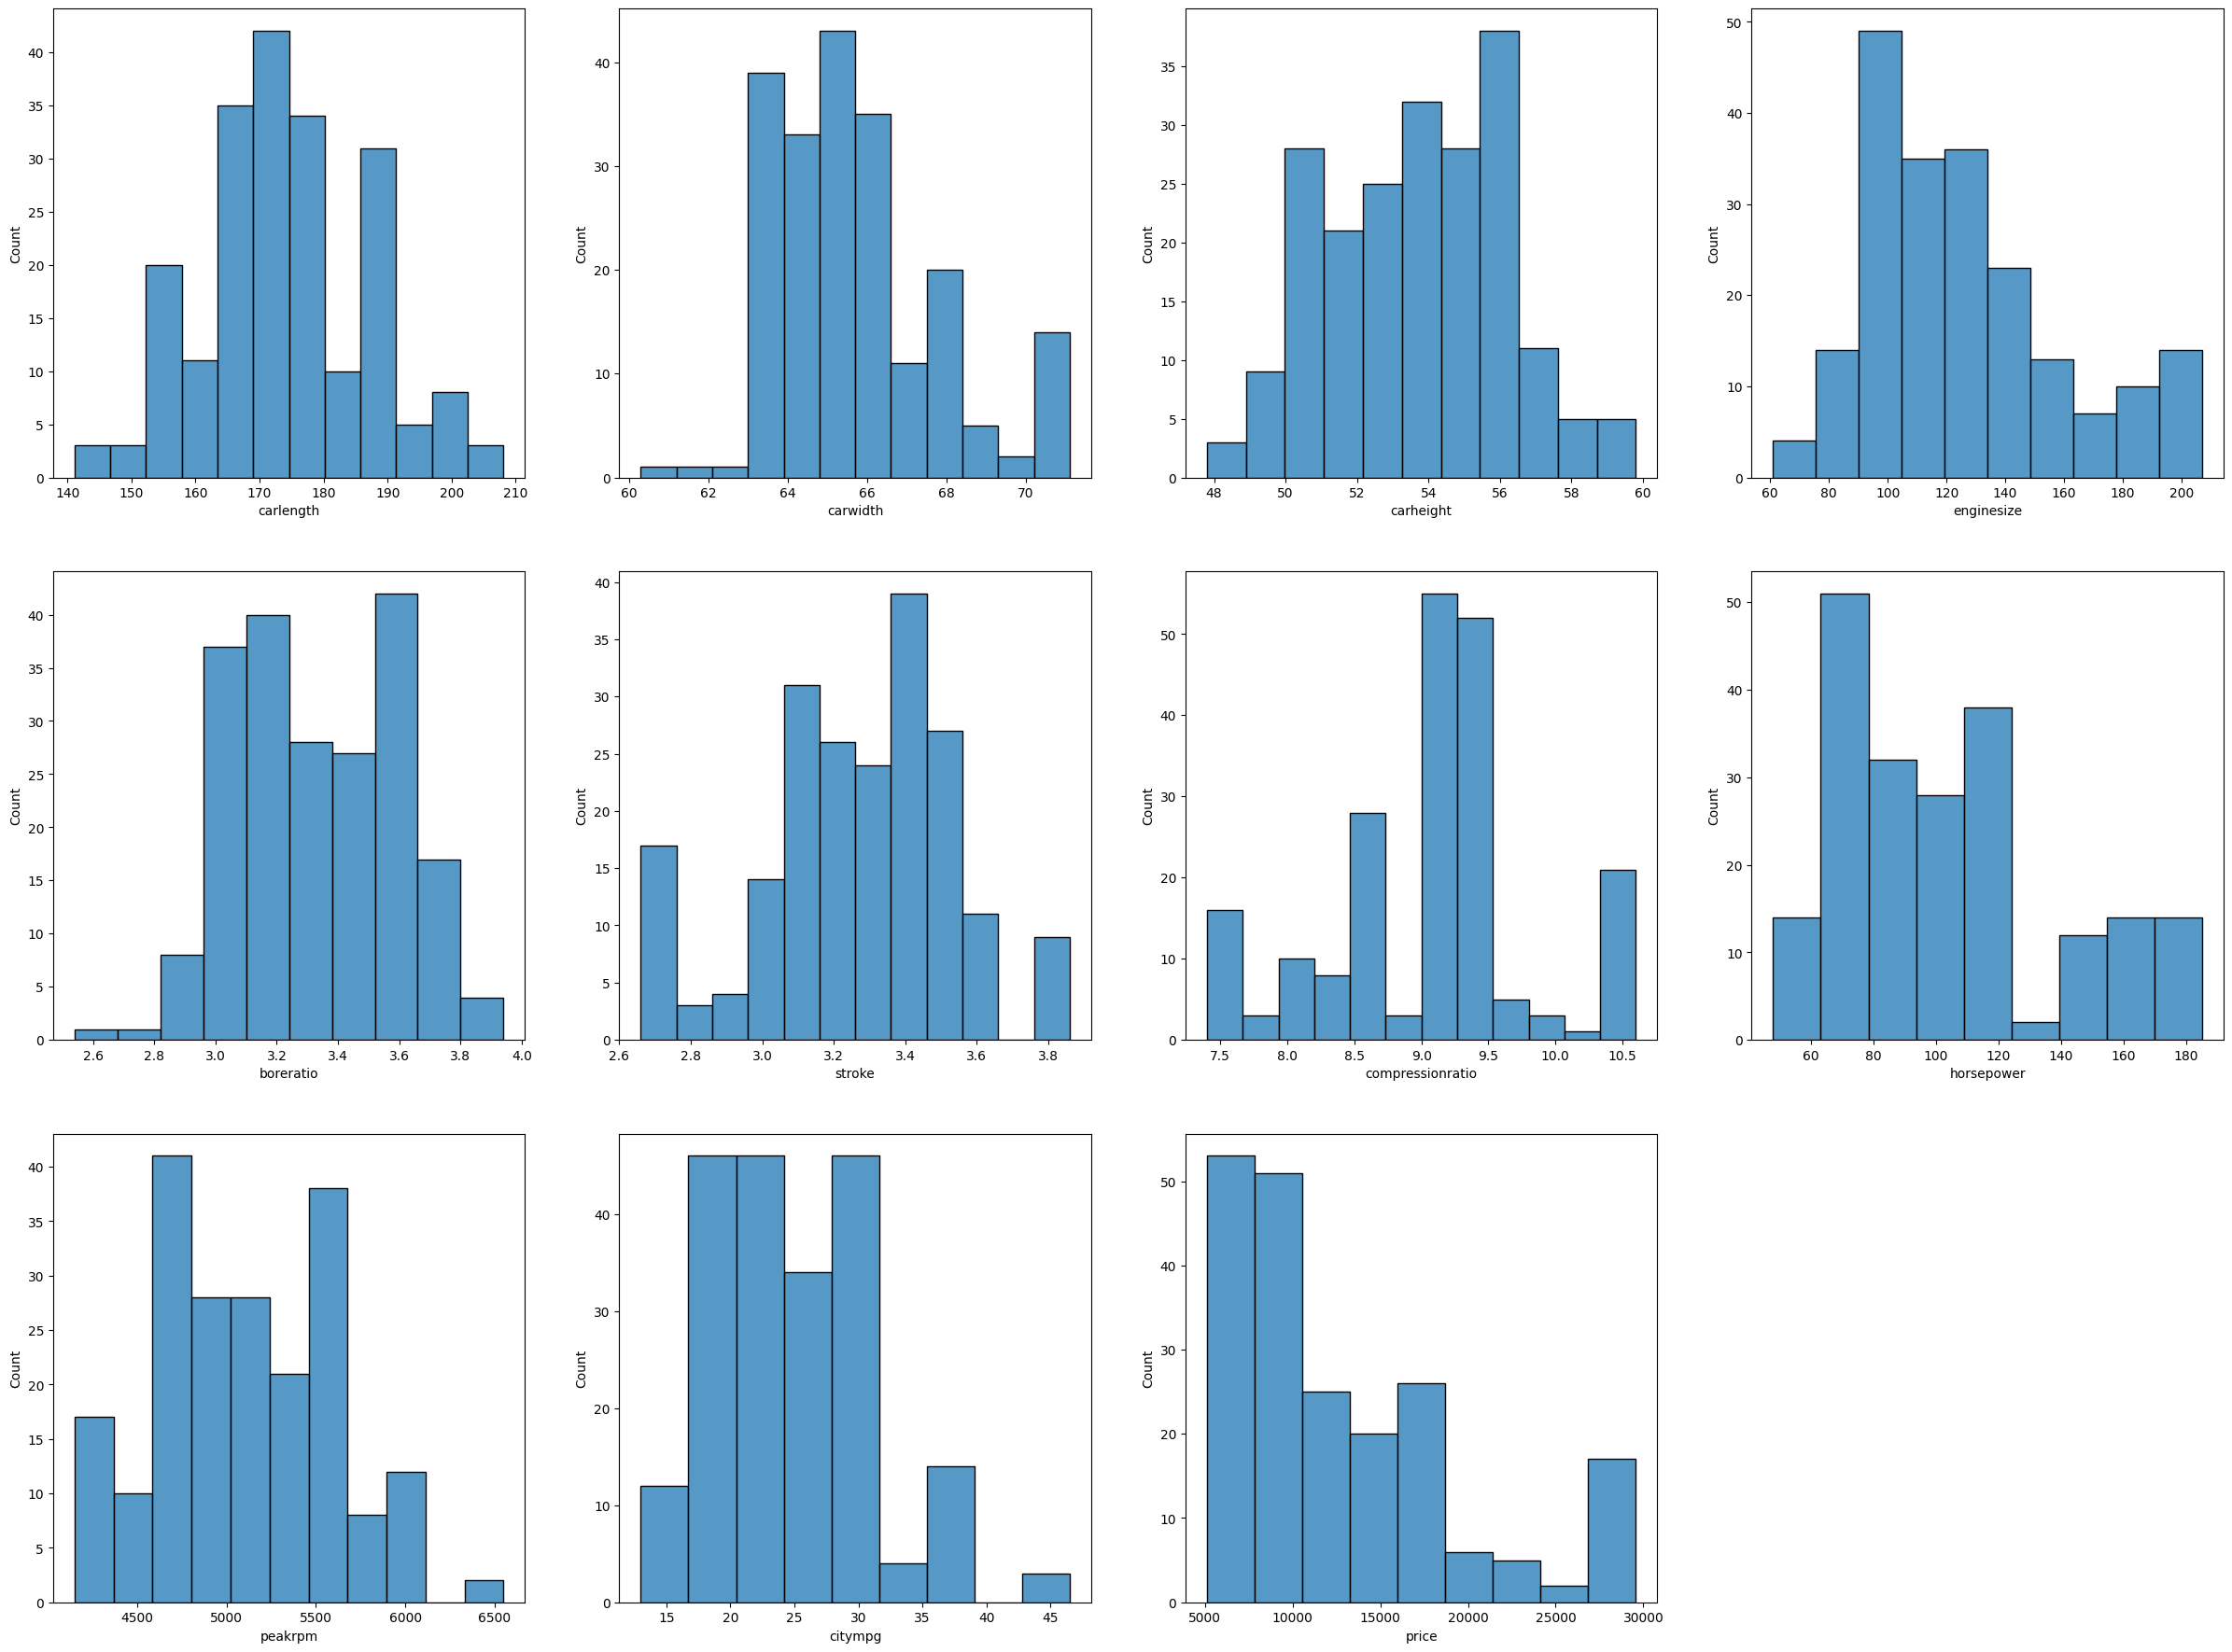

In [379]:
# To visualise the distribution of data after outlier treatment
fig=plt.figure(figsize=(30,30))
counter=0

for column in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.histplot(data=df1[column])
    plt.xlabel(column)
    counter=counter+1
    
                                

### Encoding

In [380]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

colmn_to_encode=list(df1.select_dtypes(include=['object']))
colmn_to_encode

#label_encoder is the object of LabelEncode
label_encoder= LabelEncoder()

#creating new DataFrame to store the encoded columns
df_label=df1.copy()

#Encode each column in colmn_to_encode
for column in colmn_to_encode:
    df_label[column]=label_encoder.fit_transform(df1[column])

print(df_label)



     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            5         1           0           1        0           2   
1            5         1           0           1        0           2   
2            3         1           0           1        2           2   
3            4         1           0           0        3           1   
4            4         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200          0         1           0           0        3           2   
201          0         1           1           0        3           2   
202          0         1           0           0        3           2   
203          0         0           1           0        3           2   
204          0         1           1           0        3           2   

     enginelocation  carlength  carwidth  carheight  ...  cylindernumber  \
0                 0      168.8      64.1       

### Feature Scaling

In [381]:
from sklearn.preprocessing import MinMaxScaler

#select numerical column for scaling
numerical_colmn=['carlength','carwidth','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']

#Create a scaler object
scaler=MinMaxScaler()

#Fit the scaler on the data
scaler.fit(df[numerical_colmn])

#Transform the data
scaled_data=scaler.transform(df[numerical_colmn])

#Convert scaled data to DataFrame
scaled_df=pd.DataFrame(scaled_data,columns=numerical_colmn)

#creating a new DataFrame to store after applying MinMaxScaler
df_car=df_label.copy()

#replace scaled column in original Dataframe
df_car[numerical_colmn]=scaled_df

#print the DataFrame withscaled columns replaced by original values
print(df_car)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            5         1           0           1        0           2   
1            5         1           0           1        0           2   
2            3         1           0           1        2           2   
3            4         1           0           0        3           1   
4            4         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200          0         1           0           0        3           2   
201          0         1           1           0        3           2   
202          0         1           0           0        3           2   
203          0         0           1           0        3           2   
204          0         1           1           0        3           2   

     enginelocation  carlength  carwidth  carheight  ...  cylindernumber  \
0                 0   0.413433  0.316667   0.08

In [382]:
df_car

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,5,1,0,1,0,2,0,0.413433,0.316667,0.083333,...,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.207959
1,5,1,0,1,0,2,0,0.413433,0.316667,0.083333,...,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.282558
2,3,1,0,1,2,2,0,0.449254,0.433333,0.383333,...,3,0.343396,5,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.282558
3,4,1,0,0,3,1,0,0.529851,0.491667,0.541667,...,2,0.181132,5,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.219254
4,4,1,0,0,3,0,0,0.529851,0.508333,0.541667,...,1,0.283019,5,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,0,3,2,0,0.711940,0.716667,0.641667,...,2,0.301887,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.291123
201,0,1,1,0,3,2,0,0.711940,0.708333,0.641667,...,2,0.301887,5,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.345738
202,0,1,0,0,3,2,0,0.711940,0.716667,0.641667,...,3,0.422642,5,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.406311
203,0,0,1,0,3,2,0,0.711940,0.716667,0.641667,...,3,0.316981,3,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.430763


### Data Splitting

In [383]:
#splitting dataset into features and target variables
x=df_car.drop('price',axis=1)
y=df_car['price']

In [384]:
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
0,5,1,0,1,0,2,0,0.413433,0.316667,0.083333,0,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222
1,5,1,0,1,0,2,0,0.413433,0.316667,0.083333,0,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222
2,3,1,0,1,2,2,0,0.449254,0.433333,0.383333,5,3,0.343396,5,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667
3,4,1,0,0,3,1,0,0.529851,0.491667,0.541667,3,2,0.181132,5,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556
4,4,1,0,0,3,0,0,0.529851,0.508333,0.541667,3,1,0.283019,5,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,0,3,2,0,0.711940,0.716667,0.641667,3,2,0.301887,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778
201,0,1,1,0,3,2,0,0.711940,0.708333,0.641667,3,2,0.301887,5,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667
202,0,1,0,0,3,2,0,0.711940,0.716667,0.641667,5,3,0.422642,5,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889
203,0,0,1,0,3,2,0,0.711940,0.716667,0.641667,3,3,0.316981,3,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111


In [385]:
y

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64

In [386]:
#Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##### We can explore various regression algorithms and from that we have to find the one that exhibits the highest performance

## 1.Linear Regression Algorithm

In [387]:
from sklearn.linear_model import LinearRegression
LinearModel=LinearRegression()

In [388]:
#Train the model with the provided training data
LinearModel.fit(x_train,y_train)

LinearRegression()

##### In a jupyter environment,please rerun this cell to show the HTML representationor trust the notebook.

##### On GitHub,the HTML representation is unable to render,please try loading this page with nbviewer.org¶
When we use the fit() function, the linear regression, model learns from the training data to understand how features relate to the target values.¶
Then, it adjusts its settings to make its predictions closer to the actual values.

In [389]:
linear_predictd_test=LinearModel.predict(x_test)
linear_predictd_test

array([ 0.49501423,  0.26302121,  0.13348669,  0.20418503,  0.49412497,
        0.02702604,  0.08155806,  0.05831696,  0.11512802,  0.06371071,
        0.28290807,  0.07026529,  0.26101063,  0.13250959,  0.85902857,
        0.05124946, -0.21840621,  0.22801887,  0.12800355,  0.1307993 ,
        0.15889223,  0.389047  ,  0.0519155 , -0.09147876,  0.03477603,
        0.47130162,  0.22864016,  0.28125972,  0.01537915,  0.29844195,
        0.50552141,  0.05781364,  0.00777363,  0.47690878,  0.07583977,
        0.51149662,  0.10977433,  0.10970146,  0.0013134 ,  0.22743282,
        0.08663611])

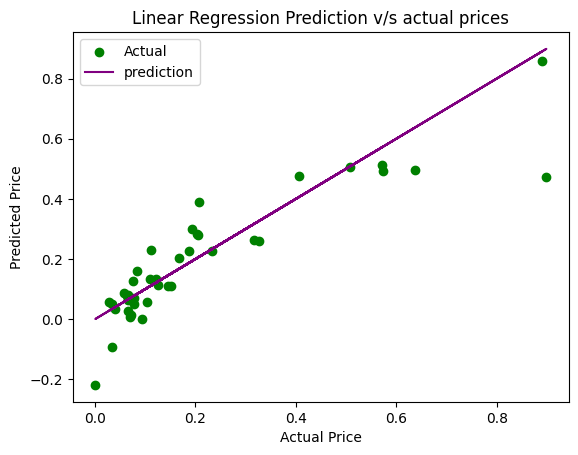

In [390]:
#Plot the actual target variable against the predicted values
plt.scatter(y_test,linear_predictd_test,color='green',label='Actual')
plt.plot(y_test,y_test,color='purple',label='prediction') #To plot the prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Prediction v/s actual prices')
plt.legend()
plt.show()

### Evaluation of Linear Regression Model

In [391]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('Linear Regression')
MAE=mean_absolute_error(y_test,linear_predictd_test)
MSE=mean_squared_error(y_test,linear_predictd_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,linear_predictd_test)
print("Mean Absolute Error(MAE):",MAE)
print("Mean Squared Error(MSE):",MSE)
print("rmse:",RMSE)
print("R Squared:",r2)


Linear Regression
Mean Absolute Error(MAE): 0.06378864380409809
Mean Squared Error(MSE): 0.009669256344642753
rmse: 0.09833237688901227
R Squared: 0.8012551509578856


In [392]:
#lr.score(x_test,y_test) calculates the R-squared score on the test data
LinearModel.score(x_test,y_test)

0.8012551509578856

In [393]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearModel,x_train,y_train,cv=5)

In [394]:
scores

array([0.82239051, 0.8916624 , 0.84729627, 0.84863143, 0.85878785])

In [395]:
scores.mean()


0.8537536926553486

## 2.Decision Tree Algorithm

In [396]:
from sklearn.tree import DecisionTreeRegressor

#creating object for DecisionTree Regression class
DecisionTree= DecisionTreeRegressor(random_state=42)

In [397]:
#training the model with the provided training data
DecisionTree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

##### In a jupyter environment,please rerun this cell to show the HTML Representation or trust the notebook

##### On GitHub,the HTML representation is unable to render,please try loading this page with nbviewer.org

In [398]:
Decision_predictedTest=DecisionTree.predict(x_test)
Decision_predictedTest

array([0.78849114, 0.32351919, 0.09510451, 0.21652351, 0.65741522,
       0.03125465, 0.00570975, 0.08011022, 0.10329676, 0.07142148,
       0.25152674, 0.07298545, 0.18981183, 0.15217715, 1.        ,
       0.03028648, 0.01127054, 0.24206842, 0.04644754, 0.10329676,
       0.12727769, 0.20805819, 0.03125465, 0.00570975, 0.06183903,
       0.78849114, 0.11682637, 0.28293034, 0.05538454, 0.2697731 ,
       0.65741522, 0.02758056, 0.09085944, 0.29112259, 0.07047813,
       0.65246264, 0.10329676, 0.18934015, 0.0942977 , 0.24206842,
       0.07186833])

### Evalution of Decision Tree Algorithm

In [399]:
print("Decision Tree Regressor:")
mae=mean_absolute_error(y_test,Decision_predictedTest)
mse=mean_squared_error(y_test,Decision_predictedTest)
rmse=np.sqrt(mse)
r2=r2_score(y_test,Decision_predictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print("RMSE:",rmse)
print("R Squared:",r2)


Decision Tree Regressor:
Mean Absolute Error(MAE): 0.044300688075894205
Mean Squared Error(MSE): 0.003760117439847213
RMSE: 0.061319796475911535
R Squared: 0.9227133973568609


In [400]:
DecisionTree.score(x_test,y_test)

0.9227133973568609

In [401]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(DecisionTree,x_train,y_train,cv=5)

In [402]:
scores

array([0.8175367 , 0.80361296, 0.55257651, 0.90095166, 0.85080316])

In [403]:
scores.mean()

0.785096197877737

### 3.Random Forest Algorithm

In [404]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
random_forest=RandomForestRegressor(random_state=42)
random_forest.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

##### In a Jupyter environment,please rerun this cell to show the HTML representation or trust the notebook.

##### On GitHub,the HTML representation is unable to render,please try loading this page with nbviewer.org.

In [405]:
Random_predictedTest=random_forest.predict(x_test)
Random_predictedTest

array([0.77517824, 0.33998076, 0.11405615, 0.22912649, 0.54991448,
       0.03218993, 0.06099374, 0.07217839, 0.15235167, 0.07169968,
       0.28487811, 0.05917929, 0.26506893, 0.144462  , 0.85620476,
       0.02772694, 0.01001787, 0.22959635, 0.06569634, 0.13761614,
       0.1311249 , 0.24657846, 0.03189646, 0.01702981, 0.05351286,
       0.77431769, 0.12497543, 0.28435281, 0.05538835, 0.28292885,
       0.55563395, 0.03176315, 0.08131771, 0.3501456 , 0.07337992,
       0.54590127, 0.15299613, 0.19207231, 0.06731518, 0.22959635,
       0.08612259])

### Evalution of Random Forest

In [406]:
print(" Random Forest")
mae=mean_absolute_error(y_test,Random_predictedTest)
mse=mean_squared_error(y_test,Random_predictedTest)
rmse=np.sqrt(mse)
r2=r2_score(y_test,Random_predictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print("RMSE:",rmse)
print("R Squared:",r2)

 Random Forest
Mean Absolute Error(MAE): 0.03430506315493195
Mean Squared Error(MSE): 0.002156935333968973
RMSE: 0.046442817894363095
R Squared: 0.955665692162482


In [407]:
random_forest.score(x_test,y_test)

0.955665692162482

In [408]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(DecisionTree,x_train,y_train,cv=5)
scores

array([0.8175367 , 0.80361296, 0.55257651, 0.90095166, 0.85080316])

In [409]:
scores.mean()

0.785096197877737

### 4.Gradient Boosting Regressor

In [410]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoosting=GradientBoostingRegressor(random_state=42)
GradientBoosting.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

##### In a Jupyter environment,please rerun this cell to show the HTML representation or trust the notebook

##### On GitHub,the HTML representation is unable to render,please try loading this page with nbviewer.org.

In [411]:
Gradient_predictd_test=GradientBoosting.predict(x_test)
Gradient_predictd_test

array([ 0.77694596,  0.33467504,  0.10146861,  0.22449502,  0.66592798,
        0.04251996,  0.06120096,  0.05750125,  0.12743437,  0.06834895,
        0.28883811,  0.07052705,  0.29565266,  0.14308511,  0.95426734,
        0.02987326, -0.01329956,  0.21053252,  0.0566461 ,  0.11429854,
        0.12562659,  0.25051637,  0.02245817,  0.01504335,  0.03722484,
        0.77730918,  0.13272431,  0.28939339,  0.05078274,  0.28939339,
        0.67180226,  0.03523445,  0.07804115,  0.39844691,  0.0822764 ,
        0.63173059,  0.15149355,  0.19181364,  0.05595142,  0.21053252,
        0.08423005])

### Evalution of Gradient Boosting Regressor

In [412]:
print("Gradient Boosting Regressor:")
mae=mean_absolute_error(y_test,Gradient_predictd_test)
mse=mean_squared_error(y_test,Gradient_predictd_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,Gradient_predictd_test)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print("RMSE:",rmse)
print("R Squared:",r2)



Gradient Boosting Regressor:
Mean Absolute Error(MAE): 0.03842768977002852
Mean Squared Error(MSE): 0.003006514727336248
RMSE: 0.054831694551019015
R Squared: 0.9382031777491971


In [413]:
GradientBoosting.score(x_test,y_test)

0.9382031777491971

In [414]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(GradientBoosting,x_train,y_train,cv=5)
scores

array([0.90816122, 0.93293351, 0.84210487, 0.92870435, 0.890541  ])

In [415]:
scores.mean()

0.9004889905876826

### 5.Support Vector Regressor

In [416]:
from sklearn.svm import SVR
svr_model=SVR()
svr_model.fit(x_train,y_train)

SVR()

##### In a Jupyter environment,please rerun this cell to show the HTML representation or trust the notebook.¶

##### On GitHub,the HTML representation is unable to render,please try loading this page with nbviewer.org.¶

In [417]:
svr_predict_test=svr_model.predict(x_test)
svr_predict_test

array([0.42284814, 0.28964647, 0.12294396, 0.21980548, 0.44559637,
       0.06528287, 0.12471098, 0.09232606, 0.18770598, 0.06519305,
       0.25539087, 0.11652752, 0.29853779, 0.22791084, 0.6992159 ,
       0.07083286, 0.06381934, 0.25061486, 0.11037597, 0.19838656,
       0.13429256, 0.32473748, 0.10705812, 0.06701176, 0.05901283,
       0.42197696, 0.29836855, 0.29809519, 0.08135931, 0.31721013,
       0.47210345, 0.07493544, 0.07447041, 0.44045867, 0.14799897,
       0.46228629, 0.18033871, 0.26713122, 0.06353236, 0.2509182 ,
       0.14362866])

### Evalution of Support Vector Regressor

In [418]:
print("Support Vector Machine(SVM):")
mae=mean_absolute_error(y_test,svr_predict_test)
mse=mean_squared_error(y_test,svr_predict_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,svr_predict_test)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print("RMSE:",rmse)
print("R Squared:",r2)

Support Vector Machine(SVM):
Mean Absolute Error(MAE): 0.07315355570019391
Mean Squared Error(MSE): 0.01207387069522734
RMSE: 0.1098811662443903
R Squared: 0.7518299729423893


In [419]:
svr_model.score(x_test,y_test)

0.7518299729423893

In [420]:
# cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svr_model,x_train,y_train,cv=5)
scores

array([0.71582215, 0.71896075, 0.57881087, 0.68243805, 0.62784249])

In [421]:
 scores.mean()

0.6647748630577605

### Conclusion

In [424]:
import pandas as pd

#Evaluation metrics result
evaluation_metrics={
     'Model':['Linear Regression','Decision Tree Regressor','Random Forest','Gradient Boosting Regressor','Support Vector Machine(SVM)'],
     'Mean Absolute Error(MAE)':[ 0.06378864380409809,0.044300688075894205, 0.03430506315493195 , 0.03842768977002852, 0.07315355570019391],                 'Mean Squared Error(MSE)':[ 0.009669256344642753, 0.003760117439847213, 0.002156935333968973, 0.003006514727336248, 0.01207387069522734],               'Root Mean Squared Error(RMSE)':[ 0.09833237688901227, 0.061319796475911535, 0.046442817894363095, 0.054831694551019015, 0.1098811662443903],           'R Squared (R^2)':[ 0.8012551509578856, 0.9227133973568609, 0.955665692162482, 0.9382031777491971, 0.7518299729423893]
}
#Create DataFrame
evalution_df=pd.DataFrame(evaluation_metrics)

#Display the DataFrame
evalution_df

,Model,Mean Absolute Error(MAE),Mean Squared Error(MSE),Root Mean Squared Error(RMSE),R Squared (R^2)
0,Linear Regression,0.063789,0.009669,0.098332,0.801255
1,Decision Tree Regressor,0.044301,0.003760,0.061320,0.922713
2,Random Forest,0.034305,0.002157,0.046443,0.955666
3,Gradient Boosting Regressor,0.038428,0.003007,0.054832,0.938203
4,Support Vector Machine(SVM),0.073154,0.012074,0.109881,0.751830


#### Linear Regression:
 Mean Squared Error (MSE) is relatively low, indicating that the model's predictions are close to the actual values on average. R-squared (R^2) value of approximately 0.80 suggests that the model explains about 80% of the variance in the target variable, which is decent but could be improved.

#### Decision Tree Regressor:
Both Mean Squared Error (MSE) and Mean Absolute Error (MAE) are lower compared to Linear Regression, indicating better performance. R-squared (R^2) value of approximately 0.92 suggests that the model explains about 92% of the variance in the target variable.

#### Random Forest Regressor: 
Random Forest shows further improvement over Decision Tree Regressor, with even lower MSE and MAE. R-squared (R^2) value of approximately 0.95 indicates that the model explains about 95% of the variance in the target variable, which is a significant improvement.

#### Gradient Boosting Regressor: 
Gradient Boosting shows similar performance to Random Forest, with low MSE and MAE. R-squared (R^2) value of approximately 0.93 suggests that the model explains about 93% of the variance in the target variable, similar to Random Forest.

#### Support Vector Regressor: 
SVM shows the highest MSE and MAE among the models evaluated. R-squared (R^2) value of approximately 0.75 indicates that the model explains only about 75% of the variance in the target variable, which is considerably lower compared to the other models.

##### In conclusion, Random Forest emerges as the optimal choice for predicting the target variable in this dataset, followed by Gradient Boosting Regressor and Decision Tree Regressor. These ensemble methods demonstrate superior predictive capability and robustness, making them suitable for real-world applications where accuracy is paramount.

In [422]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_name=[]
RMSE=[]
R2_score=[]

models=[
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

for model in models:
    model.fit(x_train,y_train)

    prediction=model.predict(x_test)

    model_name.append(model.__class__.__name__)

    RMSE.append(str(mean_squared_error(prediction,y_test,squared=False)))
    R2_score.append(str(r2_score(y_test,prediction)*100)+ "%")
    


In [423]:
models_df=pd.DataFrame({"Model-Name":model_name,"RMSE":RMSE,"R2_Score":R2_score})
models_df=models_df.set_index('Model-Name')
models_df.sort_values("R2_Score",ascending=False)

,RMSE,R2_Score
Model-Name,,
RandomForestRegressor,0.04697191083872266,95.46497940938559%
GradientBoostingRegressor,0.05451372450707627,93.89178215121933%
DecisionTreeRegressor,0.07751985035443974,87.64824527931128%
LinearRegression,0.09833237688901227,80.12551509578856%
SVR,0.1098811662443903,75.18299729423893%
